**<h1><center><font color='Green'>Stock Price Prediction using Neural Networks and Geometric Brownian Motion (GBM) Alogrithmic Combination</font></center></h1>** 

**<h3><center><font color='black'>Author: Aakash Bhunia</font></center></h3>**

**<h1><center><font color='brown'>Introduction</font></center></h1>**

The usage of Deep Learning models especially neural networks such as **Recurrent Neural
Networks (RNNs)**, **Convoluted Neural Networks (CNNs)** and other **Artificial Neural Networks
(ANNs)** have become ubiquitous in the field of equity research. More specifically, there is a
heavy utilization of such aforementioned tools for a long term and general strategization in
equity markets, capital markets and debt instrument engineering. However, for short term
granular trading there are more stochastic approaches that have been adopted for high frequency
trading such as **Brownian Motion** for asset pricing and **Black-Scholes method** for options pricing.
Therefore, this project targets for a higher applicability of Deep Learning models for more
granular strategization of stock pricing and test its performance with an added stochastic process
of Brownian motion to see if accuracy improvements could be made.

In this project we will go over how Long Short Term Memory (LSTM) and 1-dimensional Convolutional Neural Network (CNN) model could be better applied for short term prediction on stocks. On the basis of which we will be able to discern the behavior of **Geometric Brownian Motion** applied on a dynamic dataset. This dataset will consist, partially of actual observed values and LSTM predicted values in the first part and in the second part we will have the same process except we will utilize 1 dimensional CNN instead of LSTM.

**<h2><center><font color='brown'>Efficient Market Hypothesis (EMH)</font></center></h2>**

Efficient Market Hypothesis (EMH) states that all known information about investment securities, is already factored into the prices of the securities. Therefore, no amount of analysis can give investors an edge over others in a market. EMH also doesn't require investors be rational, in fact investors could act randomly and yet the entire market will be always be right in pricing available assets. <br>

Basically the only way an investor could outperform the market is by being on the positive side of a simple pareto optimality. Simply put, those who "win" are lucky and those who "lose" are unlucky. But there are two things mostly with which people could get "lucky" and that is probability distribution and information. 

However, trading on information is a Secruties and Exchange Commission (SEC) violation as it's classified as an insider trading. Therefore, the only way to outperform is to understand market risks through probability distributions. Thankfully, usage of algorithmic and novel Deep Learning tools are not outlawed (yet!).

**<h2><center><font color='brown'>What is a Brownian Motion? </font></center></h2>**

Brownian Motion has an interesting origin long before it was used in stock market price. Originally, Brownian Motion was discovered in 1827 by a biologist named Robert Brown when he noticed a "jittery" motion in the pollens he was studying. The randomness of this jittery process was formalized later as The Brownian Motion.

<p><center>
<img src="https://media.sciencephoto.com/image/c0164997/800wm/C0164997-Robert_Brown,_British_botanist.jpg" width= 300>
</center></p>
<h1><center>Robert Brown </center></h1>
<h35><center><font color='black'>Picture source:Science Photo Library</font></center></h35>

Below is a simulation of a path of a dust particle (marked in yellow) that collides with smaller particles of molecules in a gas which all move in different velocities with randomized directional movements. This influences the dust particle's velocity and rotation.

<p><center>
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Brownian_motion_large.gif" width= "400" >
    </center></p>
<h35><center><font color='black'>Picture source:Wikipedia</font></center></h35>

**<h2><center><font color='brown'>Features of a Brownian Motion </font></center></h2>**

Brownian motion is a stochastic **Weiner Process W(t)** with values in $ \mathbb{R} $ defined for t $\in $ [0,$\infty$] where the probability density function of W(t) is defined as f<sub>W(t) </sub>(x) =  
 
 ##                    $$ \frac{1}{\sqrt[]{2t\pi}}e^{-\frac{{x^{2}}}{2t}}$$


#### The following are some features of Brownian Motion which helps us to understand it from a theoretical standpoint: <br>
_(a) Brownian Motion over time (B<sub>t </sub>) is a Gaussian Process where $\forall$ 0 $ \leq $ t<sub>1</sub> $ \leq $ t<sub>2</sub> $ \leq $ ... $ \leq $ t<sub>k</sub> the random vector $ \mathbb{Z} $ = (B<sub>t<sub>1 </sub> </sub>,...,B<sub>t<sub>k </sub> </sub>) $\in$ $ \mathbb{R} $ has a multinormal distribution._

_(b) B<sub>t </sub> has a stationary incremental feature where the process (B<sub>t+h</sub>-B<sub>t</sub>)<sub>h $\geq$ 0 </sub> has the same distribution $\forall$ t; thus, E(B<sub>t+h</sub>-B<sub>t</sub>) = 0 and Var(B<sub>t+h</sub>-B<sub>t</sub>)= h_

_(c) B<sub>t </sub> has a continuous path however it can't be differential at any point._

_(d) Brownian Motion is a Martingale Process such that |E(B<sub>t </sub>)| < $\infty$ $\forall$ t_

_(e) Cov(B<sub>s </sub>,B<sub>t </sub>) = min(s,t)_

(Ermogenous, 2006)

**<h2><center><font color='brown'> Packages Utilized </font></center></h2>**

These are the following packages we will be using in this part:

_(a) **numpy**: Required for Array based mathematical functions<br>
(b) **matplotlib.pyplot**: Necessary for graphical visualization<br>
(c) **pandas**: Efficient for time series based data slicing<br>
(d) **pandas_datareader**: Useful for extracting stock data from google sources<br>
(e) **datetime**: Helps in setting timeline ranges for data extraction<br>
(f) **math**: Required for basic calculations which will show up later<br>
(g) **sklearn/mean_squared_error**: This package will be used for comparing data and graph accuracy<br>
(h) **pylab/rcParams**: Helpful for graph customization<br>
(i) **sklearn/MinMaxScalar**: Transforms data into a certain range for normalization which is helpful during algorithm application<br>
(j) **tensorflow/Sequential**: Required to import Sequential model for stacking layers in neural networks<br>
(k) **tensorflow/Dense**: Dense is a class which implements a function consisting of multiple operations in Neural Network layering such as activation, kernel and bias<br>
(l) **tensorflow/Dropout**: The Dropout class assists in setting frequency of rate at each step during training time in order to prevent overfitting<br>
(m) **tensorflow/LSTM**: LSTM class is necessary for process implementation of LSTM method which this project will discuss further in detail<br>
(n) **tensorflow/Adam**: Adam is an optimizer algorithm that is a Stochastic Gradient Descent method which will be used during LSTM training process<br>
(o) **seaborn**: Seaborn will allow for a grid based data visualization<br>
(p) **keras**: Keras package is integeral to access Artificial Neural Networks (ANNs) and will be useful for deploying our 1-dimensional convolutional network<br>
(q) **IPython/Image**: Ipython library will be utilized for embedding visualization in the Notebook_

In [160]:
## importing packages with their respective aliases

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_datareader as web
import datetime as dt
import math
import keras

from keras import layers
from IPython.display import Image
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.optimizers import Adam

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=16,10

**<h2><center><font color='brown'> Stock in Focus </font></center></h2>**

The stock which this research will focus throughout this study is S&P500 (Ticker: SPY) because
of two main reasons. Firstly, SPY consists of 500 major companies which specialize in
technology and tech centered firm operations. The highest weights within this portfolio-based stock are assigned to blue-chip stocks which show steady growth and reflect market performance over time. Secondly, SPY is
managed by Standard & Poor’s and has a long-standing track record of reflecting
diversification through constant portfolio rebalancing within this index that strengthens its ability
to hedge major risks timely. The timeline of this timeseries data is 10 years ending at the end of
2021 which will help in more accurate fitting of models.

Furthermore, SPY has a global exposure given that major U.S. corporations listed within the index has a significant presence in international markets. This allows for us to capture major international market events and foreign central bank policies such as shift in interest rates, ForEx, and micro firm based decisions that makes this ticker even more powerful for our stock research.

It is also to note that weight of stocks within SPY is continuously changed and managed for better investor returns. This is one of the reasons why US GDP data has a strong econometric correlation in the short run with S&P500 given that a rational investor would focus on profit maximization just like SPY would shift weights from poor-performing stock tickers to better performing stocks (Ros, 2019). As of April 2022, the top 5 equities in SPY are Apple, Microsoft, Amazon, Tesla and Google which make about 22% of the ETF trust.

Below represents SPY breakdown by industry weightages in it's index:

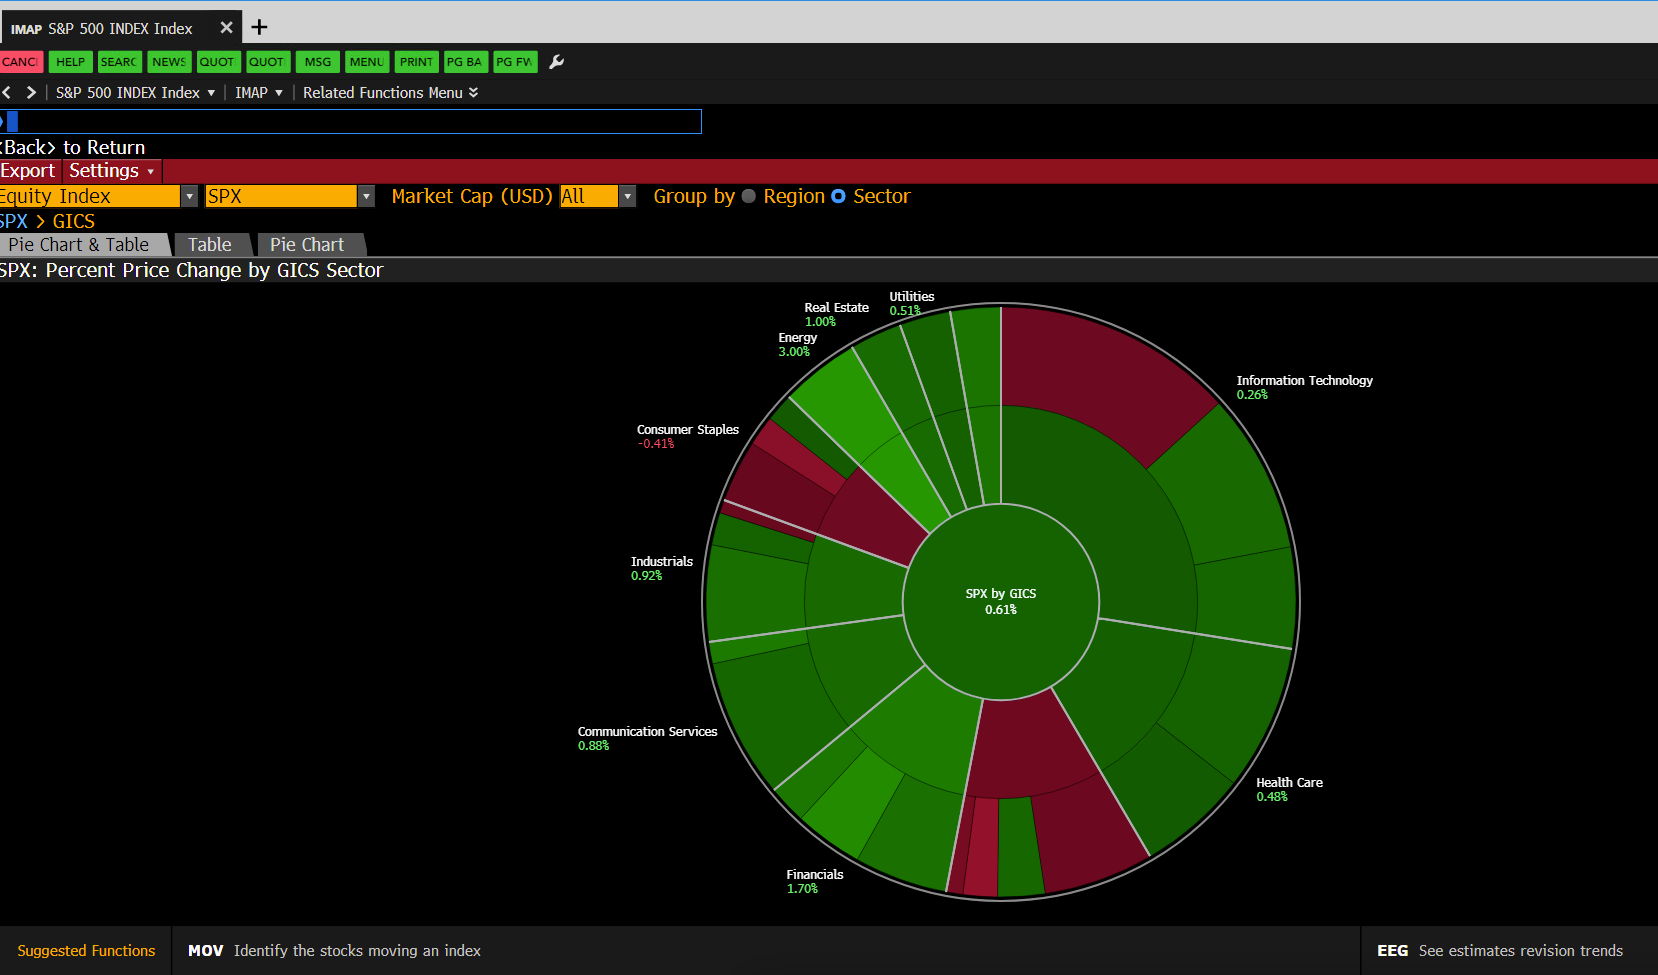

In [167]:
Image(filename="Desktop/SP.png",width=1000,height=1000)

<center>(Source: The Bloomberg Terminal)<center>

But more specifically speaking, the data is an univariate timeseries data which will take into account the
Adjusted Close values. Adjusted Close values are more popular in equity research given that it
takes into account any major price shift post-market close where events such as earnings
announcements could reflect investor confidence and as well as option pricing skewing effects.
Moreover, Adjusted Close (termed as Adj Close in datasets) prices provide a better
understanding of how markets are expected to open the next trading day and help us equip with
accurate arbitrage strategies. 

We will be applying pandas Datareader to access google, from which we will be utilizing the yahoo finance library for importing in data to proceed with our Neural Network Analysis.

Below we import and plot the data between January 1, 2012 to December 31, 2021.

**<h2><center><font color='brown'> Data Extraction </font></center></h2>**

<AxesSubplot:title={'center':'SPY Stock Price 2012-2021'}, xlabel='Date'>

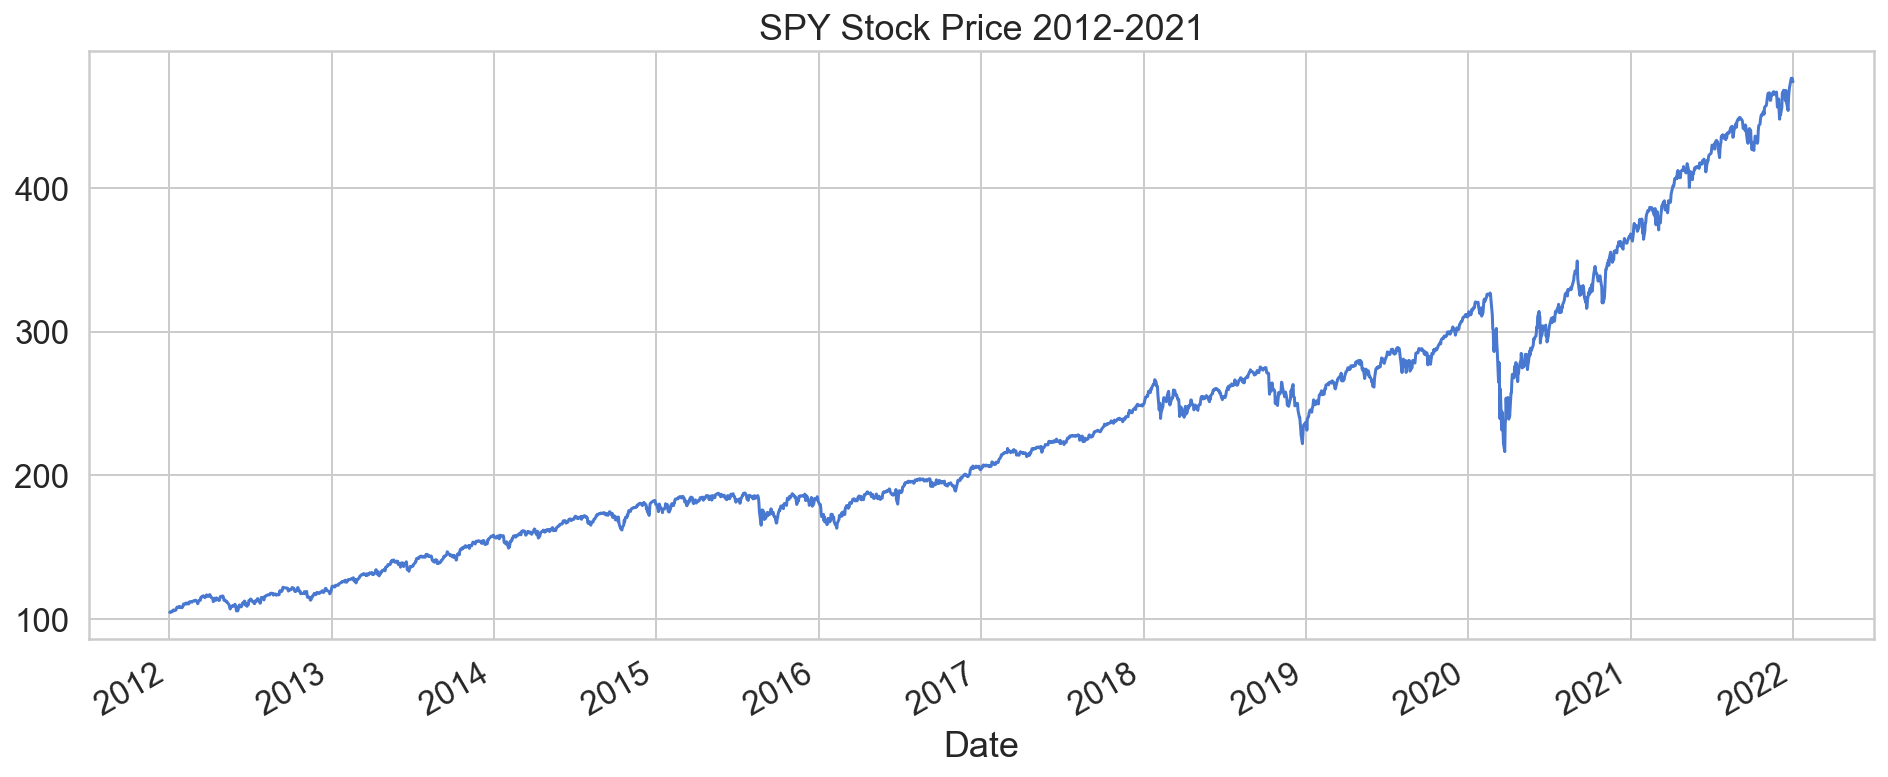

In [5]:
company = 'SPY'
#Date from which we are collecting the data (year, month, date)
start = dt.datetime(2012,1,1)
end = dt.datetime(2021,12,31)
data = web.DataReader(company, 'yahoo', start, end)
data=data["Adj Close"]
data.plot(figsize=(16,6), title="SPY Stock Price 2012-2021")

#### Below we see the first five value of the dataset that we have imported

In [6]:
data.head

<bound method NDFrame.head of Date
2012-01-03    104.950821
2012-01-04    105.115471
2012-01-05    105.395309
2012-01-06    105.123665
2012-01-09    105.378838
                 ...    
2021-12-27    475.781921
2021-12-28    475.393127
2021-12-29    476.001251
2021-12-30    474.685333
2021-12-31    473.489044
Name: Adj Close, Length: 2517, dtype: float64>

**<h1><center><font color='brown'>Part I: Long Short Term Memory Model (LSTM)</font></center></h1>** 

The first model that we will use for stock price prediction is called the Long Short term Memory Model or LSTM. LSTM's are an improvement on typical RNN networks where LSTM's operate as a state which tackles the Vanishing Gradient problem that occurs in a typical RNN during backpropagation. <br>

In our model, we will consider our timesteps (which is the last 30 days of observed values).We will see these timesteps coming into use when we create our input matrix for our LSTM model. <br>

When we apply our LSTM network, the algorithm will use the past 30 day data and pass it through a series of hidden layers that predicts the next value. These hidden layers are basically LSTM models on each step and each step has its own set of a state which collects lost information from previous steps and accounts for it through activation and loss functions before producing the actual output. Therefore, this makes LSTM a robust model for our stock price prediction.

<p align="center">
<img src="https://storage.googleapis.com/deepmind-live-cms/documents/BlogPost-Fig2-Anim-160908-r01.gif" width= "800" >
</p>

<h35><left><font color='black'>Picture source:Berkeley Artificial Intelligence Research (BAIR)</font></left></h35>

Below we focus on the process of **one single layer** which has been unrolled in time in an LSTM model. Let's focus on the cell marked at vector x<sub>t</sub> where t is the timestamp. Inside of it we see that there is a hidden state termed h<sub>t-1</sub>. This is a vector that has been provided as an input. Now, when this input passes in this cell, the first step is a sigmoid function that is attached to a forget gate (marked as an x in a pink bubble). This forget gate dicards previous memory that comes from the cell prior to it and a new refined information gets processed.

The input gate comprises of the second sigmoid function, the tan h function and the second pink bubble marked in 'x'. The process is such that vector output of h<sub>t-1</sub> multiplied by a weight and added to x<sub>t</sub> multiplied by a weight. After a bias term added to it, we get an output which is then treated with the tan h function. We run a similar process, only this time it is treated with a sigmoid function. With these two outputs we multiply them and pass them through the input gate and add it as a memory (marked in '+' in a pink bubble). This final output is called the long term memory variable.

Finally, this brings us to the output gate which comprises of the final pink bubble marked in 'x'. In this step we take a weighted sum of the hidden state h<sub>t-1</sub> and x<sub>t</sub> which we treat with a sigmoid function. This gives us the output gate variable.

We take the long term memory now, on which we apply a tan h function and multiply it with the output gate variable to provide us with the hidden state in the next cell termed as h<sub>t</sub>.

This is essentially how an LSTM model works on a microscopic level. Now let's focus on the the line which has the forget gate and the input gate. An LSTM's function to be put simply is to forget certain characterestics of a variable that has been carried into the present step and then to use sigmoid and tan h functions to convert and bring forth a new variable through the input gate that gets carried on to the next stage. 

So, in our case of stock market predictions LSTM tend to work in a way where previous characterestics of an observations get trimmed and treated continuously to provide us with a good prediction. The human process from our side is to choose appropriate number of neurons, epochs and optimizer to make sure that the Mean Squared Error doesn't overfit or underfit excessively. 

<p align="center">
<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" width= "800" >
</p>

<h35><left><font color='black'>Picture source:Towards Data Science</font></left></h35>

**<h2><center><font color='brown'> Preparing the data </font></center></h2>**

One of the most important steps prior to applying neural network on our dataset is to apply MinMaxScaler function which normalizes the dataset and all values will lie in the range of 0 to 1. But why is it an important step in deep learning?

Firstly, a scaled data will allow for faster training of the training set which will be performed soon. Secondly, larger data values which are in an unconstrained position will have higher amount of scattering which will not only slow the results but skew in our actual neural network process as well.

Therefore, in this code below the data has been scaled and also reshaped into a numpy array for better partitioning and calculation of data in further steps.

In [7]:
#Scaling the data/normalization of data
scaler=MinMaxScaler(feature_range=(0,1))
data_transform=scaler.fit_transform(np.array(data).reshape(-1,1))

#### Below we see the first 3 and the last 3 values of the dataset that has been transformed and scaled as a part of preprocessing.

In [8]:
print(data_transform)

[[0.00000000e+00]
 [4.43740122e-04]
 [1.19791944e-03]
 ...
 [1.00000000e+00]
 [9.96453533e-01]
 [9.93229473e-01]]


**<h2><center><font color='brown'> Splitting the Data </font></center></h2>**

Now here we split the data set into two parts: testing and training sets. Here, we choose a ratio of 80% of data to be training and the rest of 20% as test size. It's important to remember that in a timeseries data, the training and test data sets are seperated by an interruption in their index rather than randomly picked values put in each sets. <br>

This sequentiality is one of the reasons too that methods such as cross-validation and randomseed to ascertain train and test set sizes fall short in ascertaining data set sizes in time-series models.

In [9]:
#Constructing a train,test split on the data
training_size=int(len(data_transform)*0.80)
test_size=len(data_transform)-training_size
train,test=data_transform[0:training_size,:],data_transform[training_size:len(data_transform),:1]
training_size,test_size

(2013, 504)

**<h2><center><font color='brown'> Data Preprocessing </font></center></h2>**

Above we see that the number of data points in our training data set is 2013 and similarly the data set size of the test set is 504. 

Now, below we see is the data preprocessing step where we define a function to create matrix. The function below will create a input and output based feature matrix on the basis of our chosen timestep of past observed values. Once the first LSTM process is done, we get a new value which will shift and append to the existing matrix to create the new value. Thereby this helps us in creating a stochastic data system of input values that keeps on getting developed on every LSTM step. 

In [10]:
#Data preprocessing
#Converting an array of values into a dataset matrix

def create_dataset(dataset,time_step):
    dataX,dataY=[], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0, 0,1,2,3...29
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

Now, we define our timestep and deploy our function to create our stochastic dataset system. Note that we must do it for both the training and test data sets. <br>

It's important to note that increasing time step value makes predictions more robust but since we are looking on daily stock price values at adjusted close, we must try to keep a the predictions from overfitting. 

In [11]:
time_step=30
X_train,y_train = create_dataset(train,time_step)
X_test,y_test= create_dataset(test,time_step)

So, when we use this function and try to find the shape of our newly created matrix we see that we have 1982 records for 30 features in X_train.

In [12]:
print(X_train.shape),print(y_train.shape)

(1982, 30)
(1982,)


(None, None)

Similarly, we have 473 records and 30 features for X_test dataset. 

In [13]:
print(X_test.shape),print(y_test.shape)

(473, 30)
(473,)


(None, None)

**<h2><center><font color='brown'>Model Implementation </font></center></h2>**

Now, that we have succesfully finished our preprocessing step, we can now proceed to the actual implementation of LSTM model. But before we go into it, we have one final detour where we are required to reshape our train and test datasets in to 3-dimensional set.<br>

For example, in case of X_train's conversion into a 3-dimensional matrix, we intend to have it as (record,time-step,1) or as we see (1982,30,1). <br>

But why do we this conversion into a 3-dimensional matrix? It's because we need the X_train model's matrix to match the (time-step,1) as an input shape in our LSTM model.

In [14]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

Now we finally get to implement our stacked LSTM model! <br>

Below, I have chosen to have 3 layers of LSTM stacks with each having a 100 neurons. This stacked version of neuron layers is possible because the model type chosen here is Sequential in nature. Now,we see that every neuron in every layer has been given a random noise value with the Dropout Function since the goal here is to reduce dependency between neurons. However, such a step is being taken as an experimental approach to maintain our model's computational independence and must be done with a grain of salt as LSTM model's could leave out integral features that can skew our method. <br>

But after the entire LSTM process is computed on each layer, there is a final Dense layer which collects inputs from all the previous layers. 

In [15]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Now once the model has been defined before deployment on our data set, we can see the summary and the number of parameters expected in each layer.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

Now, we compiled this model with our optimized method of Adam which is a combination of two gradient descent methodologies of Momentum and Root Mean Square Propagation (RMSP). We also rely on a loss function minimization of Mean Squared Error (MSE).  <br>

Now to actual fitting of the model, we fit it on our training data set while the validation data set is our test set on which we make prediction on the basis of the model fitting done on the training set. <br>

We choose epochs of 100 which in simple terms is the number of simulations made on every trial of the model. The higher the number of epochs, the better the model is fit for prediction. So here we choose an optimal amount of 100 arbitrarily to steer away from any potential biases. The Batch size on the other hand denotes hyperparameters of gradient descent that controls the number of training samples used per iteration of epoch. Finally verbose is just a visual feature type to check progress when epochs are conducted. <br>

Having our model details created, we execute the process!

In [17]:
model.compile(optimizer="adam", loss='mean_squared_error')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 9s 154ms/step - loss: 0.0090 - val_loss: 0.0025
Epoch 2/100
31/31 [==============================] - 3s 103ms/step - loss: 7.5729e-04 - val_loss: 0.0035
Epoch 3/100
31/31 [==============================] - 3s 98ms/step - loss: 5.6710e-04 - val_loss: 0.0021
Epoch 4/100
31/31 [==============================] - 4s 129ms/step - loss: 5.1175e-04 - val_loss: 0.0013
Epoch 5/100
31/31 [==============================] - 3s 93ms/step - loss: 5.2505e-04 - val_loss: 0.0014
Epoch 6/100
31/31 [==============================] - 4s 124ms/step - loss: 4.7397e-04 - val_loss: 0.0012
Epoch 7/100
31/31 [==============================] - 4s 121ms/step - loss: 4.4964e-04 - val_loss: 0.0011
Epoch 8/100
31/31 [==============================] - 3s 107ms/step - loss: 4.5227e-04 - val_loss: 0.0011
Epoch 9/100
31/31 [==============================] - 3s 103ms/step - loss: 3.9678e-04 - val_loss: 0.0015
Epoch 10/100
31/31 [==============================] - 4s 116m

**<h2><center><font color='brown'> Performance Metrics Evaluation </font></center></h2>**

Now that our LSTM model on our data is done, we want to commence our check on the performance metrics. So in the step below we generate our LSTM predicted values on our training and test data sets.

In [18]:
#Prediction values at pre-performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Once we generate these predicted values, we conduct a reverse scalarization of our values. Remember, we had values ranging between 0 and 1 but now with the step done below we reverse them back into original stock price values which are more observable in practice.

In [19]:
#Inverse transformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Now we apply the Root Mean Squared Error method to find the "fitness" of the model to our original data. The formula for the Root Mean Squared Error(RMSE) on a time series data is:

## $$\sqrt{\frac{\sum_{i=1}^{N}(x_i-{\hat{x}_i{}})^{2}}{N}}$$


##### N= No. of data points<br> x<sub>i</sub>= Actual observations on time series<br>$\hat{x}$= Estimated Time Series

Below we start by comparing the actual train allocated observations against the predicted training set through LSTM computation. We find an RMSE score of 201.37 approximately.

In [20]:
###Calculating RMSE performance metrics on training data

math.sqrt(mean_squared_error(y_train,train_predict))

201.37178393240444

Similarly, we compare our actual test allocated observation against the test predicted set through LSTM and we find the RMSE score to 371.67 approximately.

In [22]:
###Calculating RMSE performance metrics on test data

math.sqrt(mean_squared_error(y_test,test_predict))

371.66923941486493

**<h2><center><font color='brown'> LSTM Plotting </font></center></h2>**

We can state here that, there is not a very big difference between the RMSE score of training and test dataset when we try to think in terms of how the same training intuition of the LSTM worked on our test dataset. <br>

Now we begin by plotting of our findings. Please note that these are the following color schemes: <br>

(1) **Blue**: Represents the entire data set <br>
(2) **Green**: Represents the predicted output/test data on the blue line or the actual values/original data set <br>
(3) **Orange**: Represents the training data predictions on the blue line or the original data set <br>

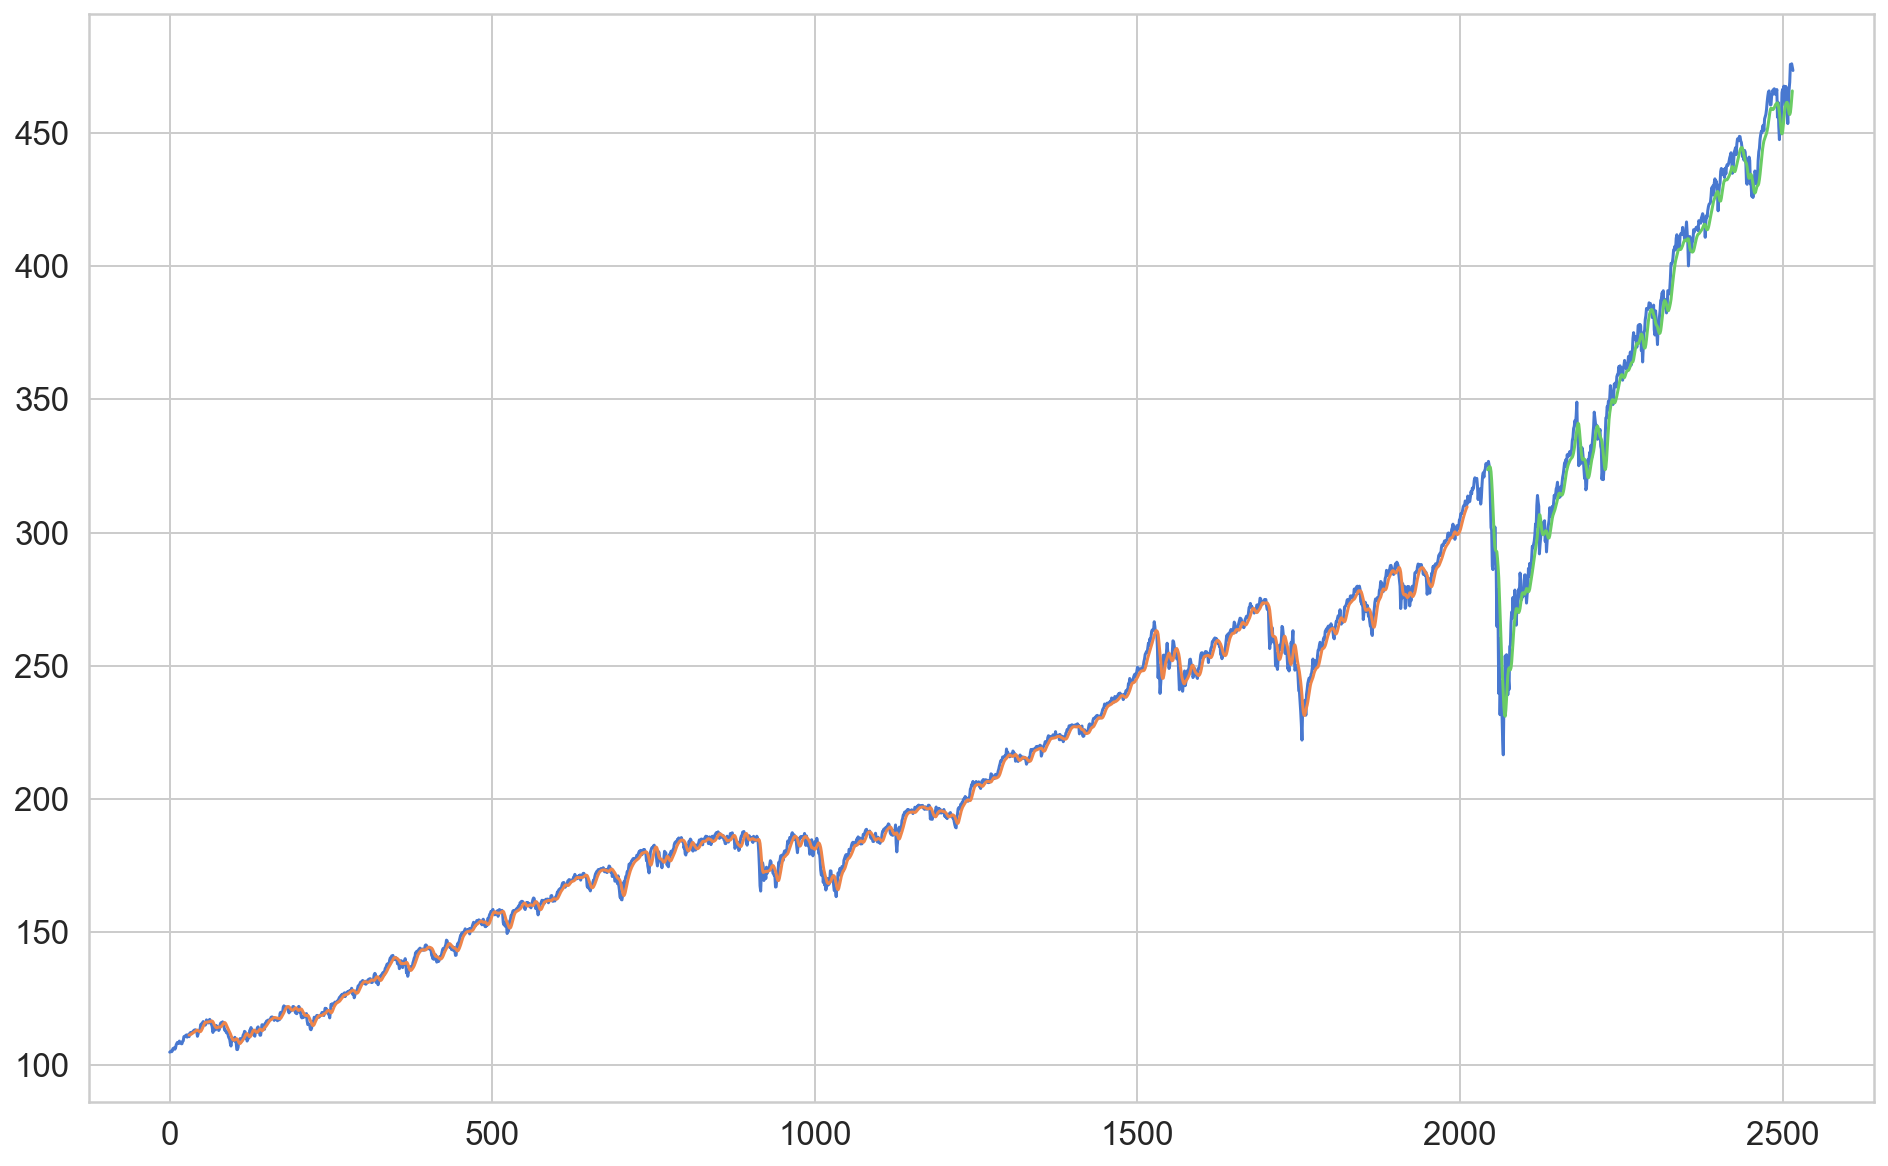

In [23]:
### Plotting 
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(data_transform)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(data_transform)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_transform))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Now we will begin writing our logic for getting the next 10 days days value which come from our LSTM method. <br>

Now in our test set we see that there are 504 values as coded below:

In [24]:
len(test)

504

Now, we reshape and create a matrix which represents the time steps required to find the next value

In [25]:
x_input=test[int(len(test)-time_step):].reshape(1,-1)
x_input.shape

(1, 30)

Now we convert this x_input matrix into a list format such that it consists of the previous 30 observations of the test data set.

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

Here comes the most crucial part where we have worked on writing a logic that gives us the next 10 day predictions. We also do this prediction on the scaled down dataset to avoid loss of actual predictions and as well as reduce time for the machine to compute. <br>

Here we start by going where the condition is that this loop runs until i is less than 10. Basically, here we find the new value after the last output on our test set under the "else" condition. We then use this value to append it our existing data set and then we make this data shift one place down so that it maintains it's time step of 30 and allows for this loop to keep computing values until the 10th loop happens before this process stops. <br>

Please note that we also reshape the array on every loop twice, once as a 2 dimensional array and once as a 3 dimensional array to comply with the input shape process in the neural networks. <br>

Below we see the output over the next 10 days. Notice, how the loop allows for the data to shift one place to the right at every single day.

In [27]:
# demonstrate prediction for next day
from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<10):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9832144]
31
1 day input [0.97251085 0.96897681 0.9706367  0.97398331 0.94595208 0.96102522
 0.93682248 0.92327525 0.94174863 0.93109303 0.94547011 0.97087769
 0.97419748 0.96571047 0.97746373 0.96629952 0.95770534 0.97708902
 0.96597818 0.95268708 0.93954919 0.96125773 0.97369718 0.98151544
 0.99940889 0.99836108 1.         0.99645353 0.99322947 0.98321438]
1 day output [[0.9840416]]
2 day input [0.96897681 0.9706367  0.97398331 0.94595208 0.96102522 0.93682248
 0.92327525 0.94174863 0.93109303 0.94547011 0.97087769 0.97419748
 0.96571047 0.97746373 0.96629952 0.95770534 0.97708902 0.96597818
 0.95268708 0.93954919 0.96125773 0.97369718 0.98151544 0.99940889
 0.99836108 1.         0.99645353 0.99322947 0.98321438 0.98404157]
2 day output [[0.9825415]]
3 day input [0.9706367  0.97398331 0.94595208 0.96102522 0.93682248 0.92327525
 0.94174863 0.93109303 0.94547011 0.97087769 0.97419748 0.96571047
 0.97746373 0.96629952 0.95770534 0.97708902 0.96597818 0.95268708
 0.93954919 0.96125773

Now, we begin plotting how the immediate short term trend of the dataset would look when we plot the LSTM predictions and append it to actual values.<br>

Our logic remains same, we create two matrices one which contains the past 30 values, and the other one which will contain the next 10 values that get predicted out of it.

In [28]:
day_new=np.arange(1,31)
day_pred=np.arange(31,41)

In [29]:
len(data_transform)

2517

In the same plotting function we also inverse transform our values to make it more observable and we find that there is a "nosedive decreasing trend" on our LSTM prediction. We will improve on this generality in the next steps through a Geometric Brownian Motion Cover on which this project aims to improve it's predictiveness. 

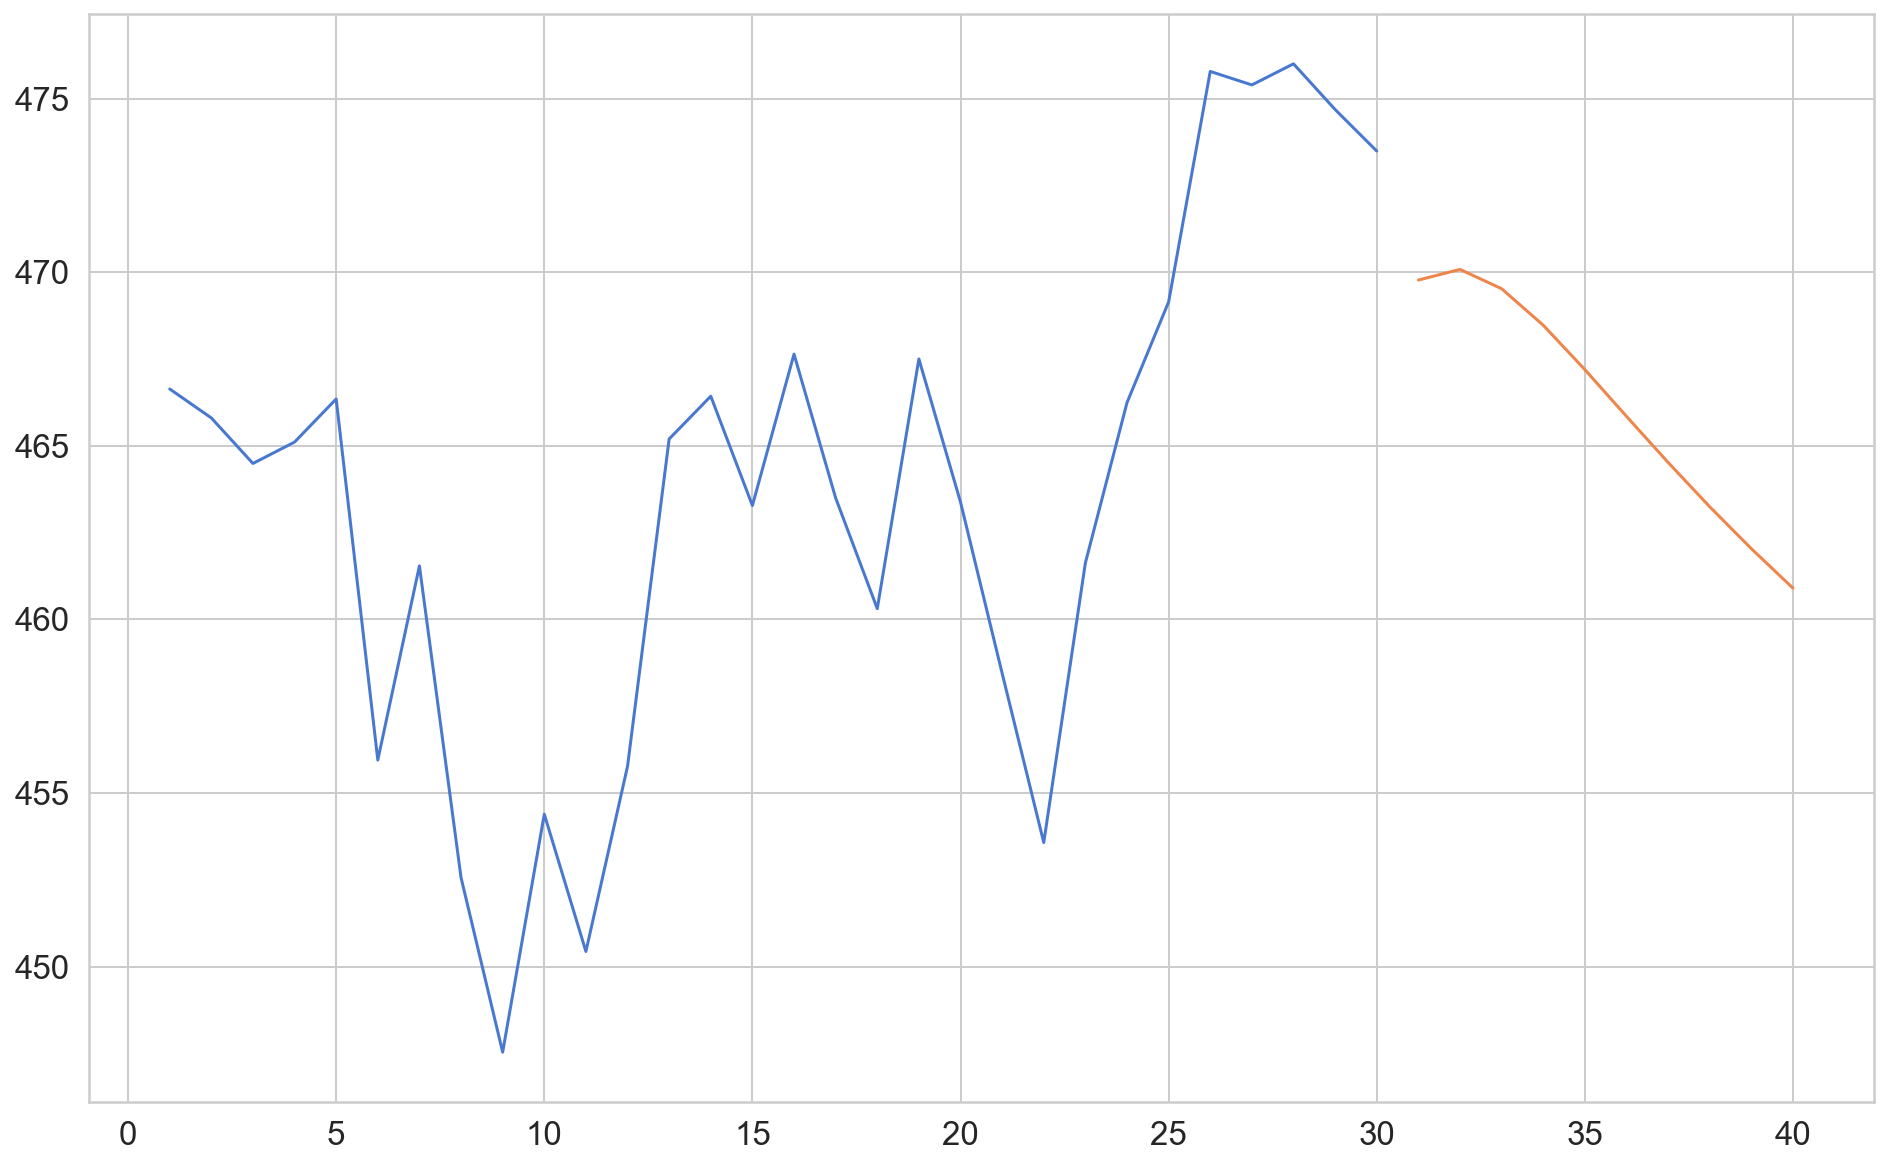

In [31]:
plt.plot(day_new,scaler.inverse_transform(data_transform[2487:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

Now we append this trend and implement it on a more macro level to see how the trend forms on a long term horizon.

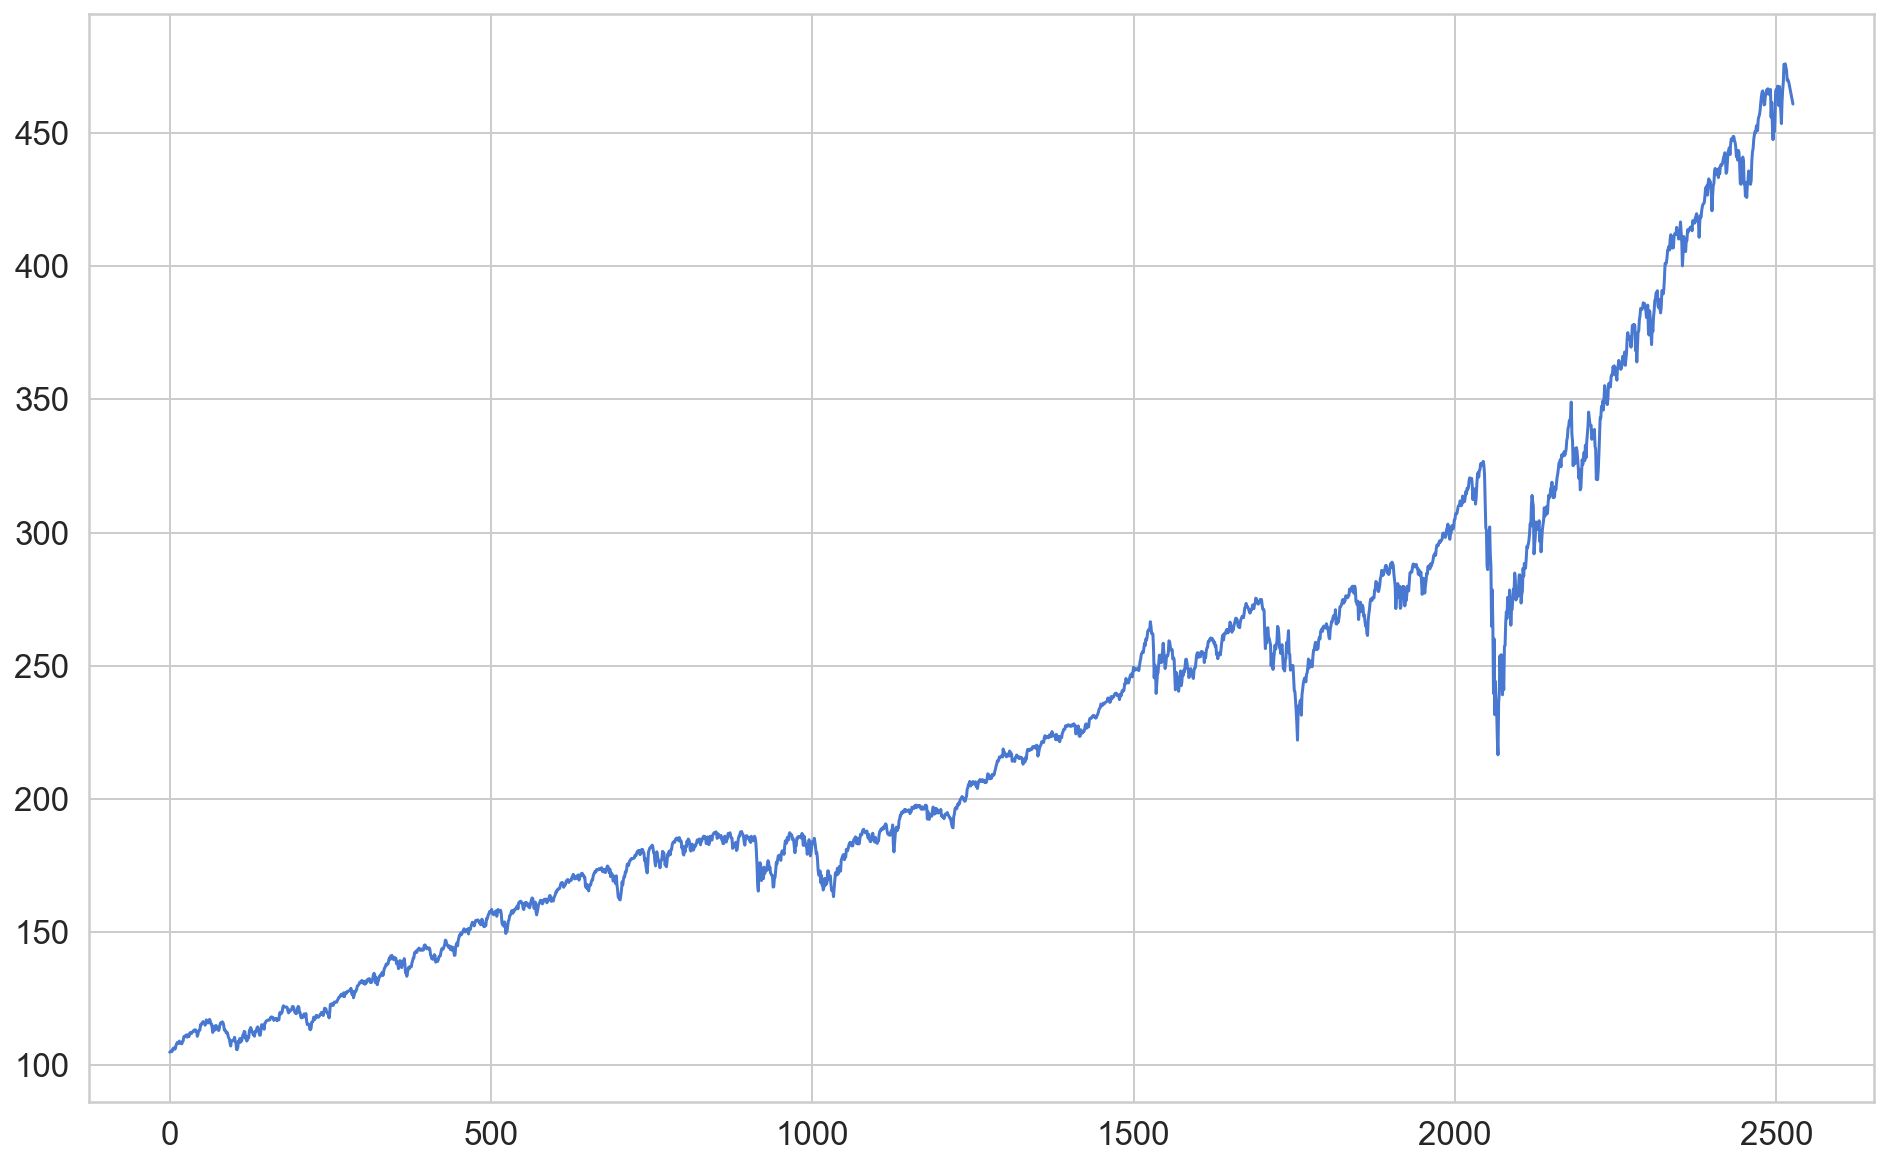

In [32]:
data2=data_transform.tolist()
data2.extend(lst_output)
data2=scaler.inverse_transform(data2).tolist()
plt.plot(data2)

**<h2><center><font color='brown'> Creating a New Data Set</font></center></h2>**

Now we compile these 10 predicted values and convert them from a numpy array to an indexed pandas array through a simple matrix transpose in the following steps.

In [33]:
actual_pred=day_pred,scaler.inverse_transform(lst_output)
actual_pred

(array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),
 array([[469.77293909],
        [470.0798695 ],
        [469.52326785],
        [468.47212296],
        [467.19353374],
        [465.84742337],
        [464.5197359 ],
        [463.24318139],
        [462.03565194],
        [460.89865146]]))

In [34]:
data_pd=pd.DataFrame(actual_pred)

In [35]:
data_pd

,0,1,2,3,4,5,6,7,8,9
0,31,32,33,34,35,36,37,38,39,40
1,[469.7729390872264],[470.07986950236045],[469.52326784811066],[468.4721229590423],[467.1935337415953],[465.84742337143143],[464.51973590340094],[463.24318138823037],[462.03565193615486],[460.89865145755266]


In [36]:
data_pred=data_pd.transpose()
data_pred.columns=["Future_date","Stock_price"]
data_pred.drop(["Future_date"],axis=1,inplace=True)

In [37]:
data_pred['Stock_price'] =  data_pred['Stock_price'].str.get(0)

In [38]:
data_pred=pd.DataFrame(data_pred['Stock_price'])

In [39]:
data_pred.head()

,Stock_price
0,469.772939
1,470.079870
2,469.523268
3,468.472123
4,467.193534


In [40]:
data_pred.shape

(10, 1)

Now, we finally have these 10 predicted values extracted into a pandas frame. Let's stop here and evaluate the timeline of these predictions. If we go back to our dataset extraction process in the very first coding line, notice that the dataset ends on 31st December, 2021. Which means that the 10 predicted values which we have gotten in this process are the adjusted close values in the next 10 trading days which we have managed to predict through LSTM. <br>

Now, let's start with importing Adjusted Close Values of the final 20 trading days of 2021 that lasts between 6th December, 2021 to 31st December, 2021.

In [41]:
company = 'SPY'
#Date from which we are collecting the data (year, month, date)
start = dt.datetime(2021,12,6)
end = dt.datetime(2021,12,31)
dt= web.DataReader(company, 'yahoo', start, end)
dt=dt["Adj Close"]

In [42]:
dt=pd.DataFrame(dt)
dt=dt.rename(columns={"Adj Close": "Stock_price"})
dt.reset_index(drop=True, inplace=True)

In [43]:
dt.shape

(19, 1)

Once we extract these 20 trading day values, we then append this with our 10 LSTM predicted values that we call the Compiled Dataset. This will give us a dataset of 30 values (matrix size would be (29,1)). At this step we are treating LSTM as an extension of observed variables to test out if it can improve performance metrics to actual observed values once a Geometric Brownian Motion (GBM) is applied on it.

The following illustration showcases our new dataset on which we will begin operating our GBM on:<br>

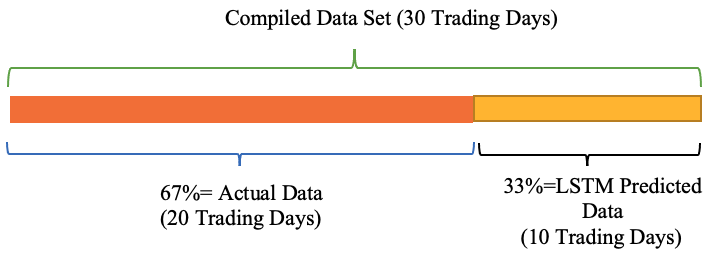

In [171]:
Image(filename="Desktop/Data.png",width=1000,height=1000)

In [44]:
compiled_data=dt.append(data_pred, ignore_index=True)

In [45]:
compiled_data.shape

(29, 1)

In [46]:
compiled_data.head()

,Stock_price
0,455.767914
1,465.195404
2,466.427216
3,463.278107
4,467.639160


**<h1><center><font color='brown'> Geometric Brownian Motion (GBM)</font></center></h1>** <br>


A simple Brownian Motion is a Random Walk model that describes a path that consists of a succession of random steps on a defined mathematical space of integers. On a simpled 1-Dimensional Random Walk Process at time $t{{W_{n}(t)}}>0$ we see that: <br>

1. The initital value of the process: W<sub>n</sub>(0)=0
2. The layer spacing between two successive jumps is equal to 1/n
3. The "up" and "down" jumps are equal and of size $1/\sqrt{n}$ with equivalent probability

But in a Geometric Brownian Motion, we have a random walk model with such features and added to that we implement a stochastic portion called the Wiener Process.

**<h2><center><font color='brown'>Wiener Process</font></center></h2>**<br>

<p><center><img src="https://static01.nyt.com/images/2013/05/21/science/21WEIN1_SPAN/21WEIN1-jumbo.jpg?quality=75&auto=webp" width=1000 height=1000></center></p>

**<h1><center>Norbert Weiner </center></h1>** <br>
<h35><center><font color='black'>Picture source:The New York Times</font></center></h35>

Named after the famous American Mathematician Norbert Wiener, the Wiener Process is a continuous-time stochastic process. The added stochastic process is often considered the standard Brownian Motion which was originally observed by Robert Brown. 

A Wiener Process W<sub>t</sub> is characterised by the following properties:

**1. W<sub>0</sub> = 0; this is an event assumed to happen surely as if it happens on a probability of 1. In other words, the set of possible exceptions may be non-empty but has a probability that can be argued to be a Lowest Upper Bound of 0.**

**2. W has independent increments: for every t > 0, the future increments W<sub>t+u</sub> - W<sub>t</sub>, u>= 0, are independent of the past values W<sub>s</sub>, s > t.**

**3. W has Gaussian increments: W<sub> t+u </sub> - W<sub>t</sub> is normally distributed with mean 0 and variance u, W<sub> t+u </sub> - W<sub>t</sub>N(0,u).**

**4. W has continuous paths: With probability of 1, W <sub> t</sub> is continuous in t.**

The process has independent increments means that if 0<= s<sub>1</sub> < t <sub> 1 </sub> <= s<sub> 2 </sub>< t<sub> 2 </sub> which makes $W_{t_{1}}-W_{s_{1}}$ and $W_{t_{2}}-W_{s_{2}}$ are independent random variables, and the similar condition will hold for n increments.(Hull,2022) <br>

To simulate single Brownian increment W<sub>i</sub> at one fixed time increment is computed by multiplying a standard random variable z <sub> i </sub> from a normal distribution N(0,1) with mean 0 and standard deviation 1 by the square root of the time increment $\sqrt{\Delta t_{i}}$. <br>

#### $$\Delta W_{i}=z_{i}\sqrt{\Delta t_{i}}$$

This cumulated sum of the Brownian increments is the discretized Brownian Motion path. Below we will start out by modelling the Brownian Motion wehere we generate standard random variables from the Normal Distribution N(0,1). We multiply this variables with the square root of the inverse value of time step which we choose to be 30 (since we are trying to predict the next 30 day variables on our compiled dataset). Finally, we will compute the cumulative sum and generate the Brownian Motion. Basically, our goal is to find a dot product between the random variables and square root of our timestep.

In [47]:
T = 1.        #time interval
N = 30        #number of points


seed = 20

d = T / N                 #time step
t = np.arange(0.0, 1.0, d)

def BrownianMotion(seed, N):
    
    np.random.seed(seed)

    Z = np.random.randn(N)     #random variables
    Z[0] = 0
    
    dW = np.sqrt(d)* Z        #single Brownian increment
    
    W = np.cumsum(dW)          #Brownian path
    
    return W

Now to define our sigma and mu values,we choose return value on our stock prices from our compiled dataset. The stationarity of these percent change returns allow for a much rigorous estimation of our brownian path. Please note that the mu and sigma values represent drift and diffusion coefficients which me multiply with 30 trading days to smooth it out.

In [48]:
data_returns=compiled_data.pct_change()
data_returns=data_returns.dropna()

In [49]:
#compute the drift(mean) and diffusion(variance) coefficients and annualize it by multiplying by 30 trading days 
mu = data_returns.mean() * 30.            
sig = data_returns.std()* np.sqrt(30.)

print(mu)
print(sig)

Stock_price    0.013073
dtype: float64
Stock_price    0.047389
dtype: float64


Assuming that constant drift and volatility throughout a longer time period is not realistic. This is one of the reasons why we are focussing on short-run prediction of 30 days. Now with the diffusion and drift values computed, we proceed with building our GBM function where we add in a stochasticity to them. Here we apply an Euler-Maruyama (EM) method to simulate a solution to our Stochastic Differential Equation (SDE).

**<h2><center><font color='brown'>Euler–Maruyama Approximation</font></center></h2>** <br>

An Euler–Maruyama(EM) approximation method is a simple method for numerical approximation of a closed-form solution to a SDE where we are able to generate a Stochastic Process Path approximation. <br>

The first order term for an Euler–Maruyama method is as follows:

X(t<sub>i+1</sub>) = X(t<sub>i</sub>) + f(X(t<sub>i</sub>))$\Delta t$ + g(X(t<sub>i</sub>))$\Delta W_{i} $

where i = 0,1,2,...,N-1 with the initial value X(t<sub>0</sub>)=X<sub>0</sub>

Euler–Maruyama approximation tends to converge with a strong order 0.5 under Lipscitz and bounded growth conditions as well and therefore we see the actual EM implementation formula as follows:

## $$S_{0}*e^{(\mu -\frac{1}{2}*\sigma ^{2})*t_{n}+\sigma W_{n-1}}$$

(Bayram, Partal and Buyukoz, 2018)

Below we will be utilizing mu and sigmas to compute our deterministic and stochastic part. Furthermore, we will also use our initial stock price vis-a-vis first value to our compiled data, to ascertain an origin point from which our Brownian Path starts.Finally, the EM assists in our approximation of the stock price path and helps us in making conclusions to our GBM model. 

In [50]:
#Constructing GBM

# Parameters:
# So - initial stock price 
# mu - the mean of returns 
# sigma - standard deviation of returns (volatility) 
# W - Brownian motion/stochastic part
# T - time horizon
# N - number of intervals
# We are using equation (4)

def GBM_Exact(So, mu, sigma, W, N, t):
    
    S = []
    S.append(So)
          
    for i in range(1,N):
        drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
        diffusion = sigma * W[i-1]                #Calculating the stochastic part
        S_i = So * np.exp(drift + diffusion)
        S.append(S_i)
        
    return S

In [51]:
So = compiled_data[:1]
mu = mu
sigma = sig
W = BrownianMotion(seed, N)
N = 30   #for the totality of 30 days 
T = 1.0        

t = np.linspace(0., T, N)    #time increments

**<h2><center><font color='brown'>LSTM+Geometric Brownian Motion Model</font></center></h2>** <br>

Now that all values within our GBM model has been defined, we proceed to fit it on our GBM_Exact function and plot our findings over timestep indexes. Notice how the movement has changed to a growing trend but with stochastic movements and a certain side-ways motion over a short time that allows for smooth observations against the clear trend we saw in sole LSTM motion. This is due to a dynamic method of GBM application on a prior LSTM mixed dataset.

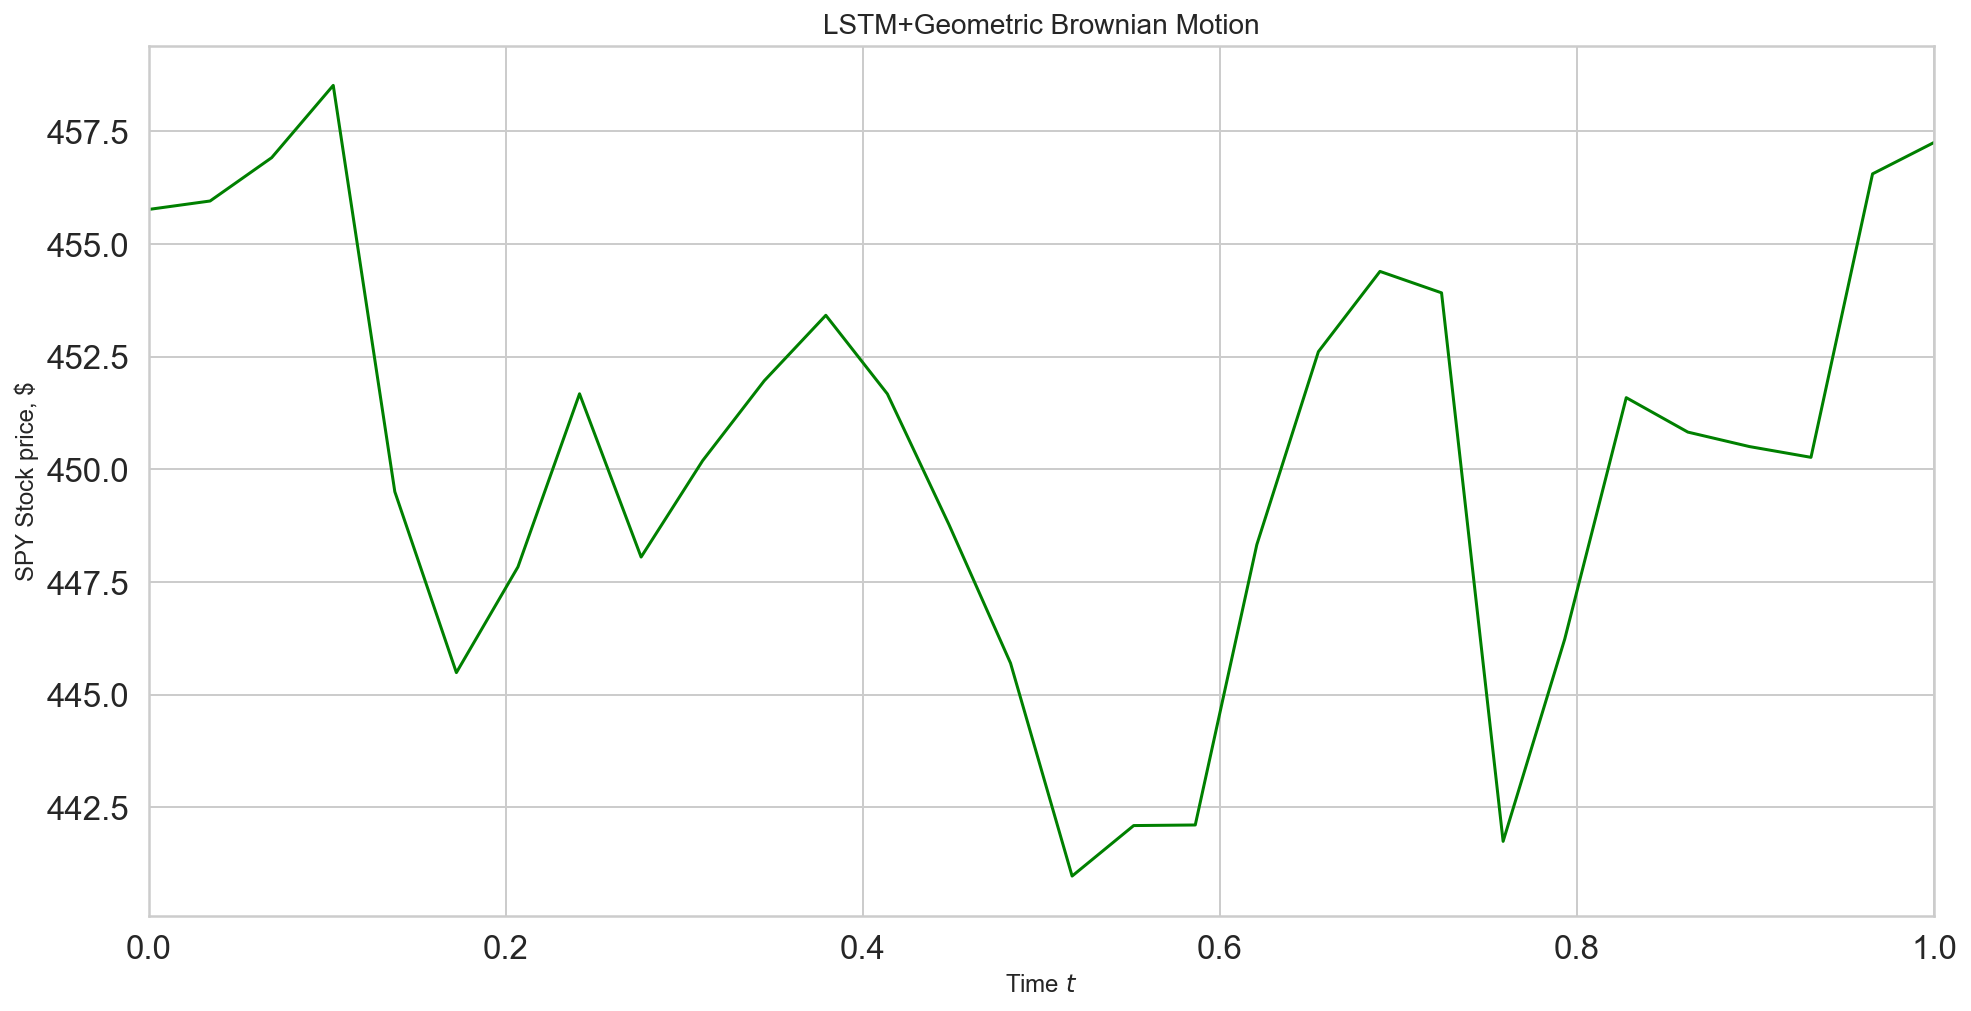

In [52]:
#plot solution

compiled_solution = GBM_Exact(So, mu, sig, W, N, t)
compiled_solution=np.reshape(compiled_solution,(30,1))
compiled_solution=pd.DataFrame(compiled_solution)
compiled_solution=compiled_solution.rename(columns={"0": "Stock_price"})

plt.figure(figsize = (16, 8))
plt.plot(t, compiled_solution, color = "green")

#plt.scatter(t, solution, color = "black")
plt.title('LSTM+Geometric Brownian Motion', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SPY Stock price, $', fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

**<h2><center><font color='brown'>Geometric Brownian Motion on Observed Dataset</font></center></h2>** <br>

In this part, we apply the same Geometric Brownian Motion model on an undoctored dataset (without any LSTM involvement) to check how it compares against our LSTM+GBM modelling. So we extract 30 days of data starting from 6th of December,2021 Notice this is the same starting date for our compiled_data set. It's very important that we maintain our calendar dates to avoid biased results and data comparison.

In [53]:
#For mu and sigma values for Geometric Brownian Motion for last 30 days
import datetime as dt
company = 'SPY'
#Date from which we are collecting the data (year, month, date)
start = dt.datetime(2021,12,6)
end = dt.datetime(2022,1,15)
brown_data = web.DataReader(company, 'yahoo', start, end)
brown_data=brown_data["Adj Close"]
brown_data=pd.DataFrame(brown_data)

In [54]:
brown_data.head()

,Adj Close
Date,
2021-12-06,455.767914
2021-12-07,465.195404
2021-12-08,466.427216
2021-12-09,463.278107
2021-12-10,467.639160


In [55]:
returns=brown_data.pct_change()
returns=returns.dropna()

In [56]:
brown_data.shape

(29, 1)

In [57]:
#compute the drift(mean) and diffusion(variance) coefficients and annualize it by multiplying by 30 trading days 
mu = returns.mean() * 30.            
sig = returns.std()* np.sqrt(30.)

print(mu)
print(sig)

Adj Close    0.018915
dtype: float64
Adj Close    0.053783
dtype: float64


In [58]:
So = brown_data[:1]
mu = mu
sigma = sig
W = BrownianMotion(seed, N)
N = 30   #For the totality of 30 days
T = 1.0        

t = np.linspace(0., T, N)    #time increments

**<h2><center><font color='brown'>Geometric Brownian Motion Model</font></center></h2>** <br>

Now that we have our values prepared, we again apply the GBM model on the raw data values to find how a Geometric Brownian Motion will look like on an unfiltered data. Notice, upon plotting the graph we see that the ending and the starting points have approximately the equivalent peak indexes (visually speaking). There is no directional movement noted as such here and it could be argued that a missing LSTM part could cause this.

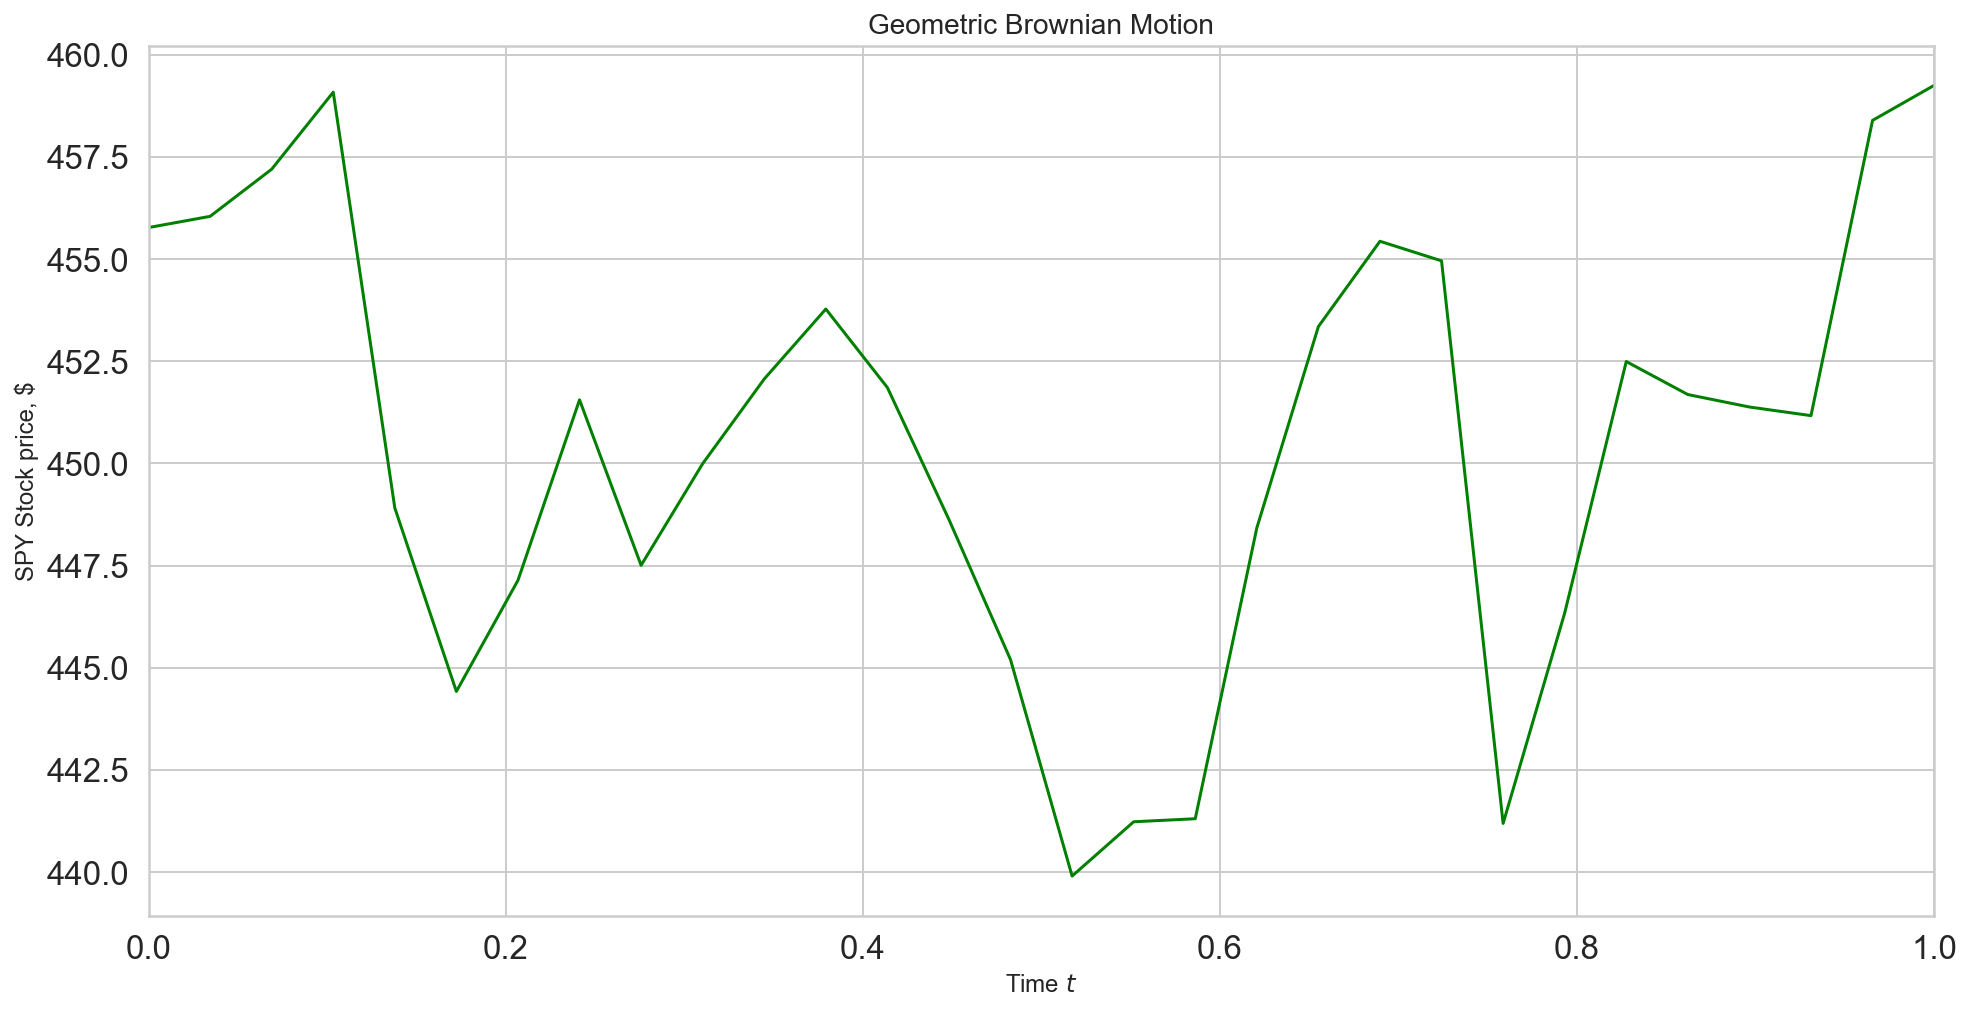

In [59]:
#plot solution

brownian_solution = GBM_Exact(So, mu, sig, W, N, t)
brownian_solution=np.reshape(brownian_solution,(30,1))
brownian_solution=pd.DataFrame(brownian_solution)
brownian_solution=brownian_solution.rename(columns={"0": "Stock_price"})

plt.figure(figsize = (16, 8))
plt.plot(t, brownian_solution, color = "green")

#plt.scatter(t, solution, color = "black")
plt.title('Geometric Brownian Motion', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SPY Stock price, $', fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

**<h2><center><font color='brown'>Comparative Study</font></center></h2>**
Now, we do a comparative analysis of our predictions and how they look like. We also test our performance metrics on it. We start by extracting the data which the market actually obseves during the time period that gets predicted over the same 30 day period that the LSTM+GBM and pure GBM models had predicted previously.

In [60]:
import datetime as dt

company = 'SPY'
#Date from which we are collecting the data (year, month, date)
start = dt.datetime(2022,1,17)
end = dt.datetime(2022,3,1)
general_data = web.DataReader(company, 'yahoo', start, end)
general_data=general_data["Adj Close"]

In [61]:
general_data.reset_index(drop=True, inplace=True)

In [67]:
general_data=pd.DataFrame(general_data)

Finally upon plotting all of our predictions in one single plot we notice these few things:

1. LSTM observation gives GBM a slight upward directional movement (almost a correction throughout the path) although LSTM+GBM seems to do an overestimation.

2. Both Brownian Motion and LSTM models fail to predict ending direction with respect to actual observations, with LSTM having clearly a higher deviation.

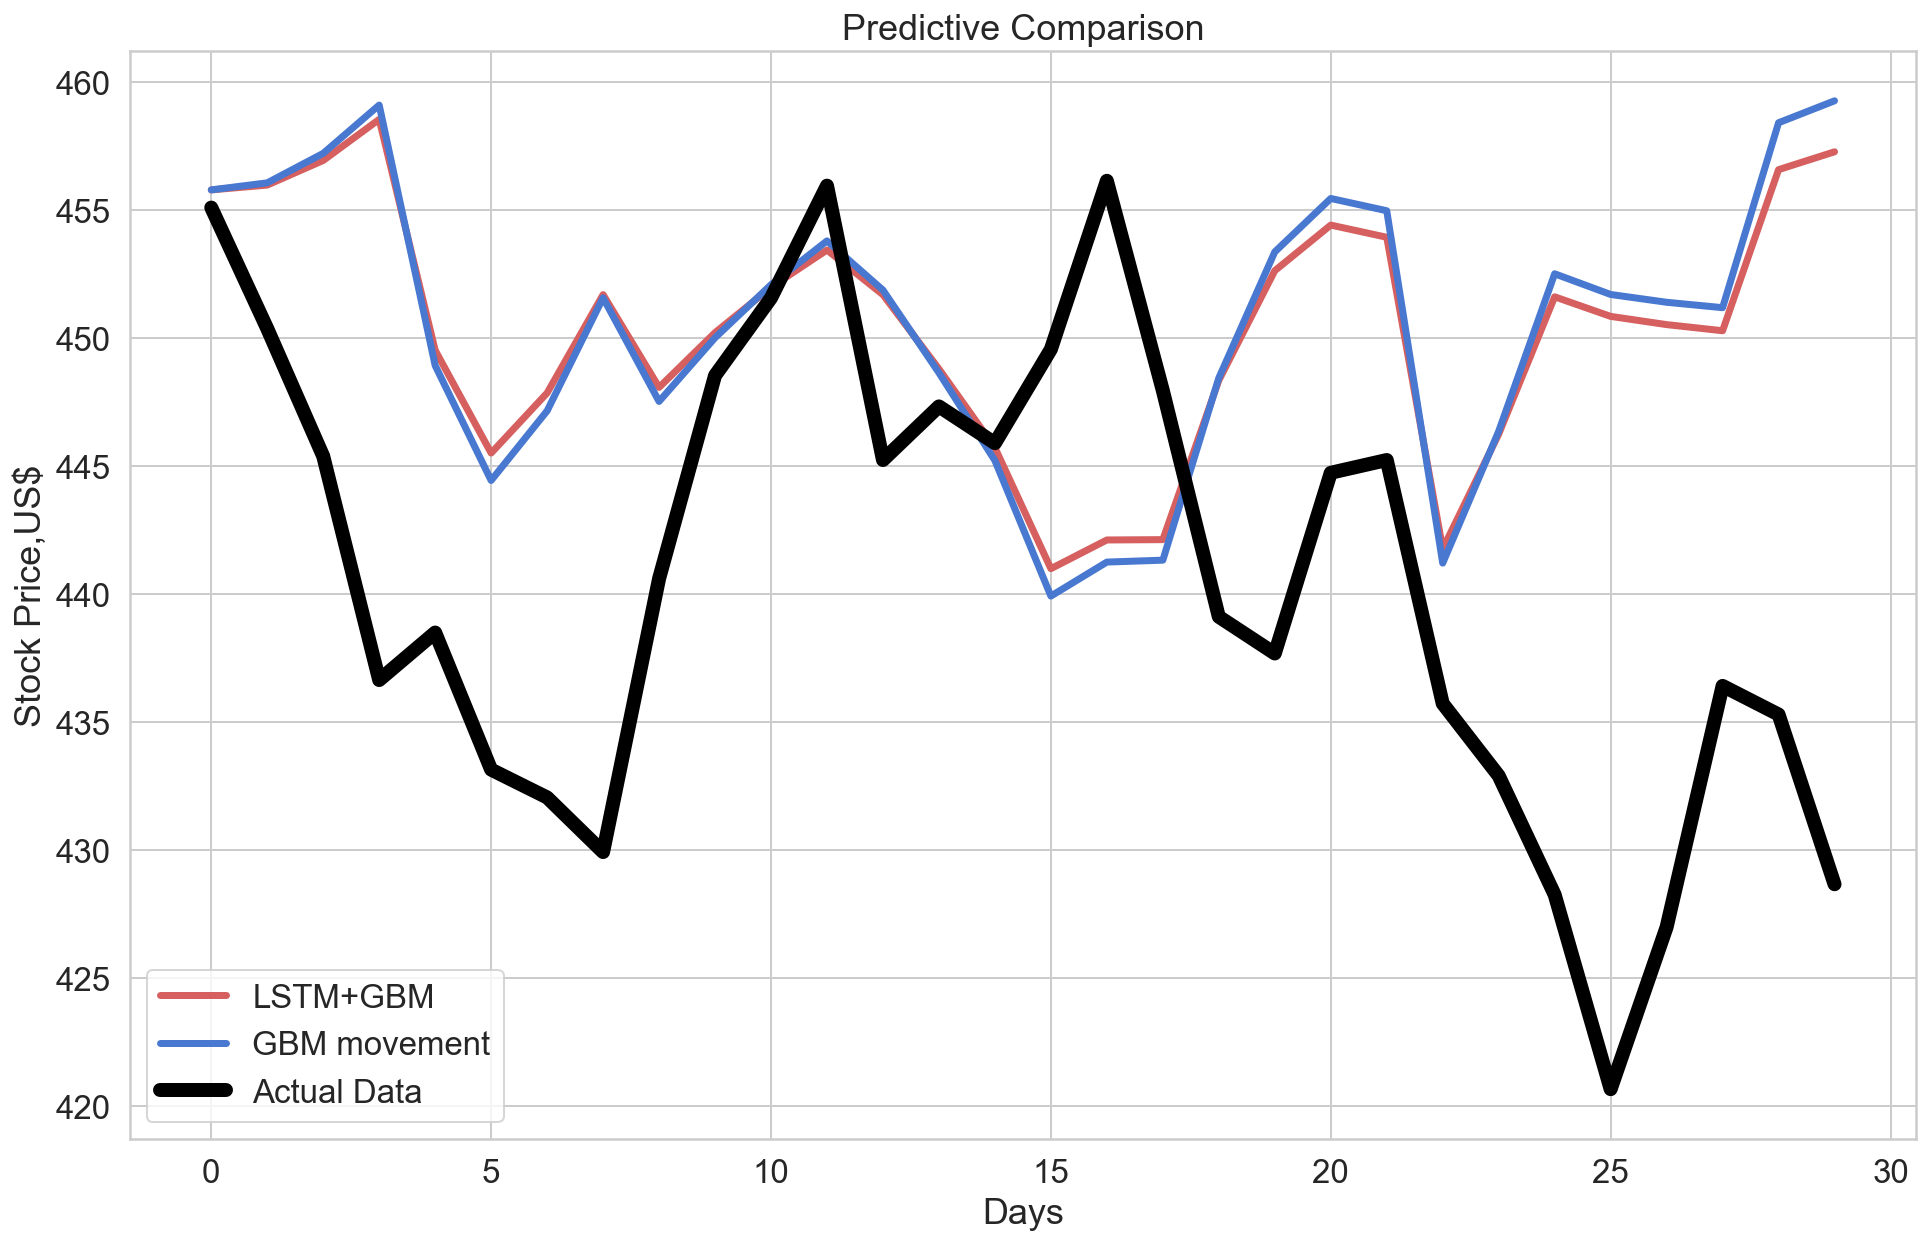

In [68]:
plt.plot(compiled_solution, color='r', label='LSTM+GBM',linewidth=3.5)
plt.plot(brownian_solution, color='b', label='GBM movement',linewidth=3.5)
plt.plot(general_data, color='black', label='Actual Data',linewidth=7.0)

plt.xlabel("Days")
plt.ylabel("Stock Price,US$")
plt.title("Predictive Comparison")

plt.legend()

**<h2><center><font color='brown'>RMSE Metrics on Predictions</font></center></h2>** <br>

Finally as we compute the RMSE to test fitness of predictivity between the LSTM+GBM motion to general data and pure GBM to general data, we see that the former outperforms the latter model by close to 49 basis points! Although it must be pointed out that the tail end of GBM was incorrect in predicting the tail end of final observations, and with LSTM implementation this mistake couldn't be rectified. Had the final observations for GBM been correct, LSTM+GBM model would outperform GBM model even more significantly and could have had a very less RMSE score and prove itself to be a more robust model.

In [70]:
math.sqrt(mean_squared_error(general_data,compiled_solution))

14.402012715907395

In [71]:
math.sqrt(mean_squared_error(general_data,brownian_solution))

14.899140292353366

**<h2><center><font color='brown'>Arbitrage Value</font></center></h2>** <br>

In this final part, we analyze what an Arbitrage Value would be predicted if this methodology was deployed in an actual stock market trading. Please note, that our arbitrage function has been created on an assumption that an investor manages to have perfect trade action of lowest value of buy and highest value of sale during our 30 period.

The observation arbitrage was approximately 15.75 dollars per share of SPY and our method of LSTM+GBM showed an arbitrage was approximately 16.28 dollars per share while pure GBM method profits showed 19.34 dollars per share. The prediction of our custom model was slightly bullish but extremely close when compared to the gold standard pure GBM model!

In [76]:
#Arbitrage Value

def Arbitrage_value(data):
    min_point=int(data.idxmin())
    min_value=data.min()
    max_value=data[min_point+1:].max()

    Arbitrage_value=max_value-min_value
    
    return(round(Arbitrage_value,5))

In [77]:
float(Arbitrage_value(compiled_solution))

16.28179

In [78]:
float(Arbitrage_value(brownian_solution))

19.34412

In [79]:
float(Arbitrage_value(general_data))

15.75107

Now, we move onto our second neural network model implementation with 1-Dimensional Convolutional Neural Network. All the process in this half of our study is as same as we did in the previous part except will replace LSTM with CNN and derive our algorithm to check if we can make any improvements as such on our directional outcomes of our stock price prediction.

**<h1><center><font color='brown'>Part II: 1-Dimensional Convolutional Neural Network (CNN)</font></center></h1>** 

Let's first consider the case of how a 1D convoluted network will be applied for our stock data prediction. As seen below, the CNN 1D method would take a matrix of our observed values which will be our input and take a product with a filter matrices on different layers to provide us with a Convoluted Feature or also known as output features which will consist of our stock price predictions under this method. 

Our input shape would be of (30,1) matrix shape. The way we arrive at this shape is using our time steps. Simply put, we will look into the last 30 trading day of values of stocks again to produce the next unobserved trading day adjusted close stock price value of SPY.

It's important to note that this input shape is a one dimensional matrix array, so we can think of it as a set of observed 30 scalar vectors in the input.

<p align="center">
<img src="https://media.giphy.com/media/i4NjAwytgIRDW/giphy.gif" width= "600" >
</p>
<h35><left><font color='black'>Picture source:Giphy</font></left></h35>

However, in the above illustration what we have is an image based CNN which explains the basic dimensionality and filter based approach to a CNN. But perhaps a better representation of the workings of a 1D CNN convolving over time could be seen in the illustration below where multiple features convolve by one spot in a certain matrix formation over time.

In our case, we will apply our 1D CNN on a univariate time series model (we will have only one feature) which keeps moving to the right in batches of 30 to produce the next value. Therefore, our input matrix during process implementation will be of (30,1).

<p align="center">
<img src="https://www.macnica.co.jp/business/ai_iot/columns/image5_2.png" width= "600" >
</p>
<h35><center><font color='black'>Picture source:Macnica Japan</font></center></h35>

**<h2><center><font color='brown'> Data Preprocessing </font></center></h2>**

We begin our familiar process with Data Preprocessing where we scale and split the data before fitting the model. Notice, we will keep our split ratios of 80:20 train to test consistent to operate within the parameters of _Cetris Paribus_

In [80]:
scaler=MinMaxScaler(feature_range=(0,1))
data_cnn=scaler.fit_transform(np.array(data).reshape(-1,1))
print(data_cnn)

[[0.00000000e+00]
 [4.43740122e-04]
 [1.19791944e-03]
 ...
 [1.00000000e+00]
 [9.96453533e-01]
 [9.93229473e-01]]


In [81]:
#Constructing a train,test split on the data
training_size=int(len(data_cnn)*0.80)
test_size=len(data_cnn)-training_size
train,test=data_cnn[0:training_size,:],data_cnn[training_size:len(data_cnn),:1]
training_size,test_size

(2013, 504)

In [82]:
time_step=30
X_train,y_train = create_dataset(train,time_step)
X_test,y_test= create_dataset(test,time_step)

**<h2><center><font color='brown'>Model Implementation </font></center></h2>**

Once the train and test datasets are prepared with the timesteps of last 30 trading day observations in mind, we process to fit our Convolutional 1D network. 

We have chosen a stacked Conv1D network such that there are three layers with 256, 512 and 1024 neurons in each layer in an ascending format. The intuition for choosing neurons in such a manner is to allow for better filtering for predictions on each layer so that odd divergences could be avoided but yet there is a room for stochasticity. 

Also, each layer has a "RELU" activation function which is a Rectified Linear Unit. This activation function is unique as it is a piecewise linear function where half of input domain is treated as linear and the other half is treated as nonlinear. This activation function overcomes the problem of Vanishing Gradient Descent (loss of data) during backpropagation and is helpful in avoiding any negative values.

Lastly, we choose our standard optimizer function of "Adam" and Loss function of "mse" or mean squared error. After, having set all of our parameters we run 100 epochs of our model, the same number of epochs as we did for LSTM.

In [100]:
model = keras.Sequential([
    layers.Conv1D(256, 1, activation="relu", input_shape=(time_step, 1)),
    layers.Conv1D(512, 1, activation="relu"),
    layers.Conv1D(1024, 1, activation="relu"),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(30, activation="relu"),
    layers.Dense(1),
])

model.compile(optimizer='adam', loss='mse')

In [101]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 6s 169ms/step - loss: 0.0055 - val_loss: 0.0016
Epoch 2/100
31/31 [==============================] - 5s 146ms/step - loss: 1.8253e-04 - val_loss: 0.0014
Epoch 3/100
31/31 [==============================] - 4s 144ms/step - loss: 1.5120e-04 - val_loss: 0.0013
Epoch 4/100
31/31 [==============================] - 4s 138ms/step - loss: 1.4224e-04 - val_loss: 0.0013
Epoch 5/100
31/31 [==============================] - 4s 137ms/step - loss: 1.3411e-04 - val_loss: 0.0013
Epoch 6/100
31/31 [==============================] - 4s 138ms/step - loss: 1.2319e-04 - val_loss: 0.0011
Epoch 7/100
31/31 [==============================] - 4s 140ms/step - loss: 1.2110e-04 - val_loss: 0.0011
Epoch 8/100
31/31 [==============================] - 5s 145ms/step - loss: 1.1664e-04 - val_loss: 9.6502e-04
Epoch 9/100
31/31 [==============================] - 5s 162ms/step - loss: 9.9784e-05 - val_loss: 8.7431e-04
Epoch 10/100
31/31 [==============================]

**<h2><center><font color='brown'> Performance Metrics Evaluation </font></center></h2>**

Now, we begin evaluating our performance metrics of our model predictions of RMSE against our training and test sets respectively.

In [102]:
#Prediction values at pre-performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [103]:
#Inverse transformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Below we can see a RMSE gap between training and test predictions to be quite similarto what we had in LSTM implementation. However, the overall accuracy of our predictions could change later on when we apply our GBM model on our dynamic data set.

In [104]:
###Calculating RMSE performance metrics on training data

math.sqrt(mean_squared_error(y_train,train_predict))

199.68575643156768

In [105]:
###Calculating RMSE performance metrics on test data

math.sqrt(mean_squared_error(y_test,test_predict))

369.4103464124902

**<h2><center><font color='brown'> 1-Dimensional CNN Plotting </font></center></h2>**

Now we plot our model's findings. Please note that these are the following color schemes: <br>

(1) **Blue**: Represents the entire data set <br>
(2) **Green**: Represents the predicted output/test data on the blue line or the actual values/original data set <br>
(3) **Orange**: Represents the training data predictions on the blue line or the original data set <br>


When comparing this to LSTM's fitness plot, we can see a general "shakiness" in CNN's plot.

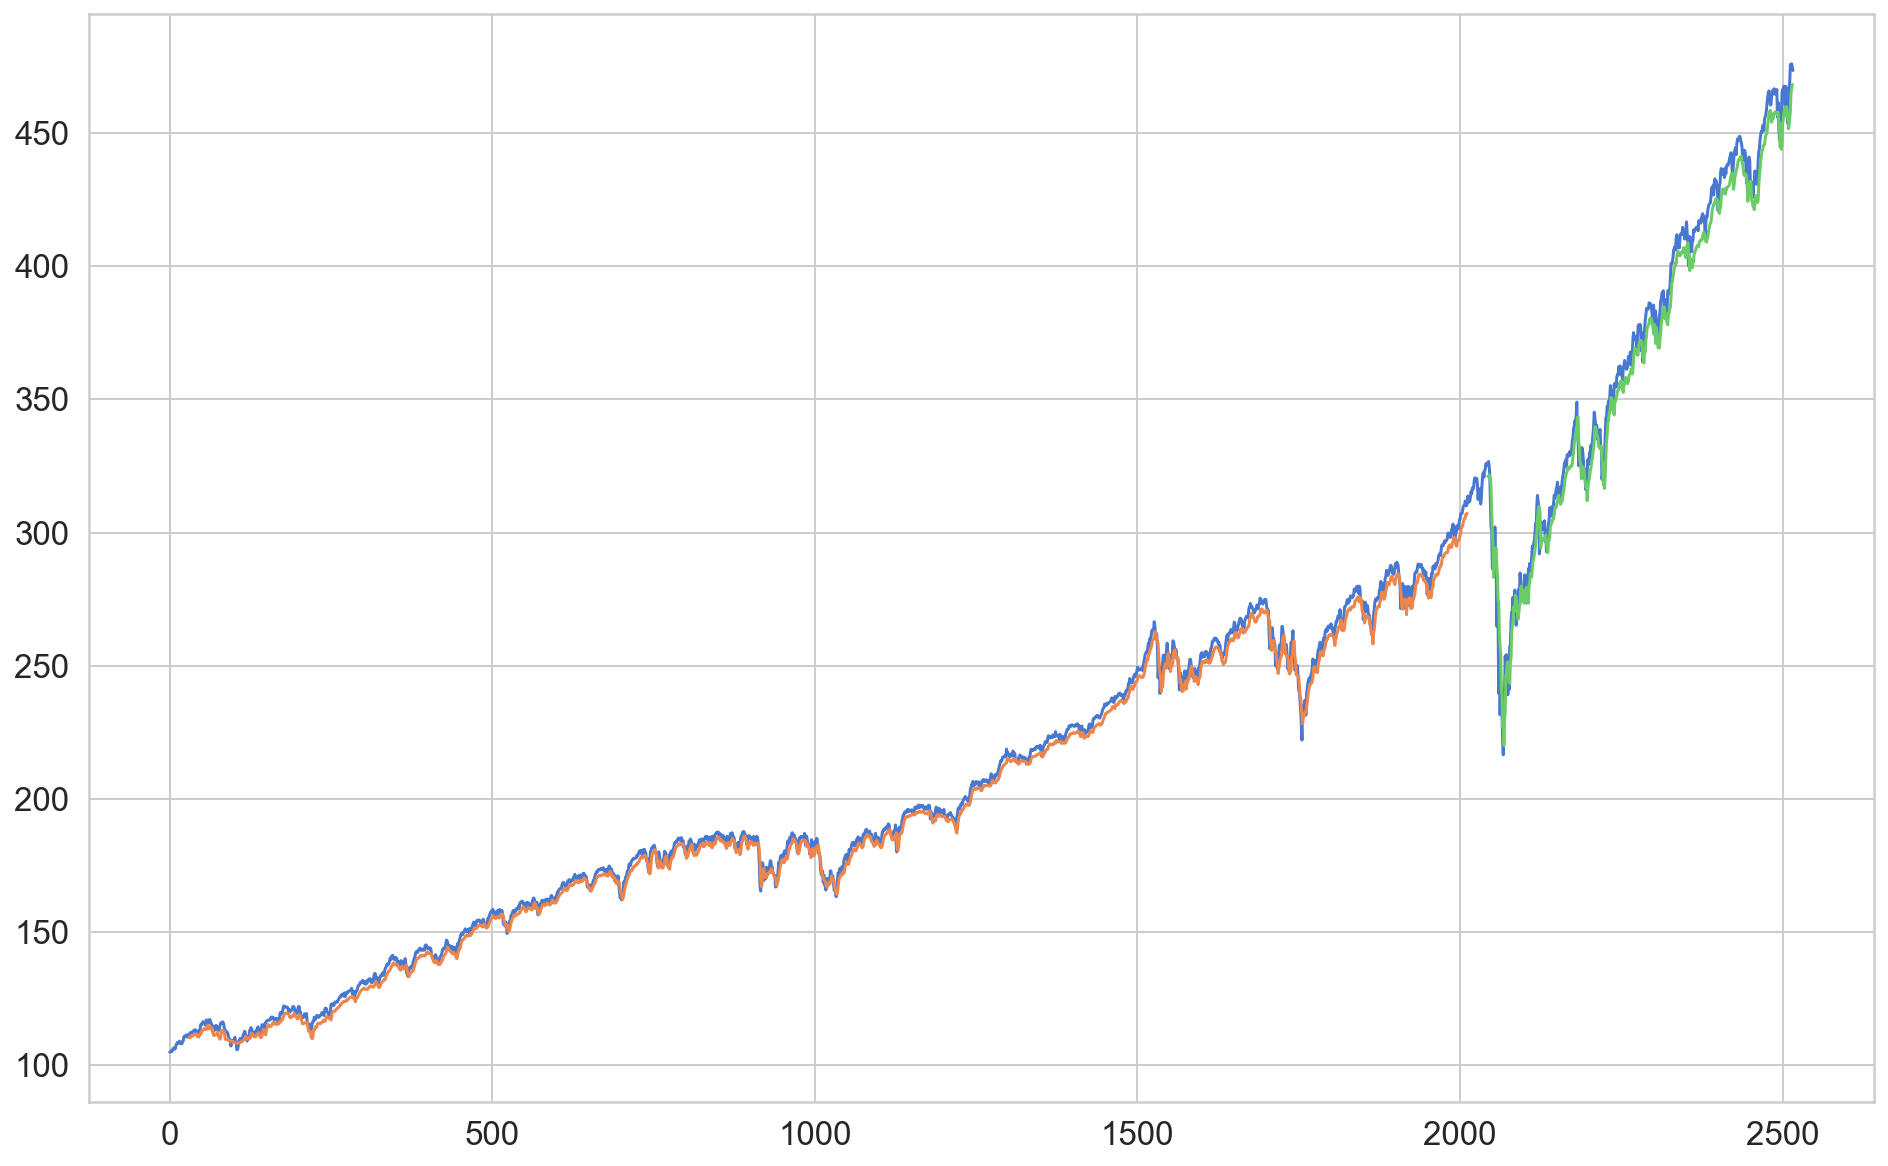

In [106]:
### Plotting 
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(data_cnn)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(data_cnn)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_cnn)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_cnn))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**<h2><center><font color='brown'> Predicting Values </font></center></h2>**

Now we implement our previously used logic to find the next 10 days of data predicted via 1D CNN process.

In [107]:
len(test)

504

In [108]:
x_input=test[int(len(test)-time_step):].reshape(1,-1)
x_input.shape

(1, 30)

In [109]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [110]:
# demonstrate prediction for next day
from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<10):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9786611]
31
1 day input [0.97251085 0.96897681 0.9706367  0.97398331 0.94595208 0.96102522
 0.93682248 0.92327525 0.94174863 0.93109303 0.94547011 0.97087769
 0.97419748 0.96571047 0.97746373 0.96629952 0.95770534 0.97708902
 0.96597818 0.95268708 0.93954919 0.96125773 0.97369718 0.98151544
 0.99940889 0.99836108 1.         0.99645353 0.99322947 0.97866112]
1 day output [[0.9744916]]
2 day input [0.96897681 0.9706367  0.97398331 0.94595208 0.96102522 0.93682248
 0.92327525 0.94174863 0.93109303 0.94547011 0.97087769 0.97419748
 0.96571047 0.97746373 0.96629952 0.95770534 0.97708902 0.96597818
 0.95268708 0.93954919 0.96125773 0.97369718 0.98151544 0.99940889
 0.99836108 1.         0.99645353 0.99322947 0.97866112 0.9744916 ]
2 day output [[0.96022505]]
3 day input [0.9706367  0.97398331 0.94595208 0.96102522 0.93682248 0.92327525
 0.94174863 0.93109303 0.94547011 0.97087769 0.97419748 0.96571047
 0.97746373 0.96629952 0.95770534 0.97708902 0.96597818 0.95268708
 0.93954919 0.9612577

Now we see a very interesting pattern when we compute and inverse transform the predicted data. We see a decreasing staircase pattern but is rather in an exponential decline. However, lets remember that Neural Networks when put in a dynamic dataset will act as more of a correction to directional movement when there is an implemented GBM cover.

In [111]:
day_new=np.arange(1,31)
day_pred=np.arange(31,41)

In [112]:
len(data_cnn)

2517

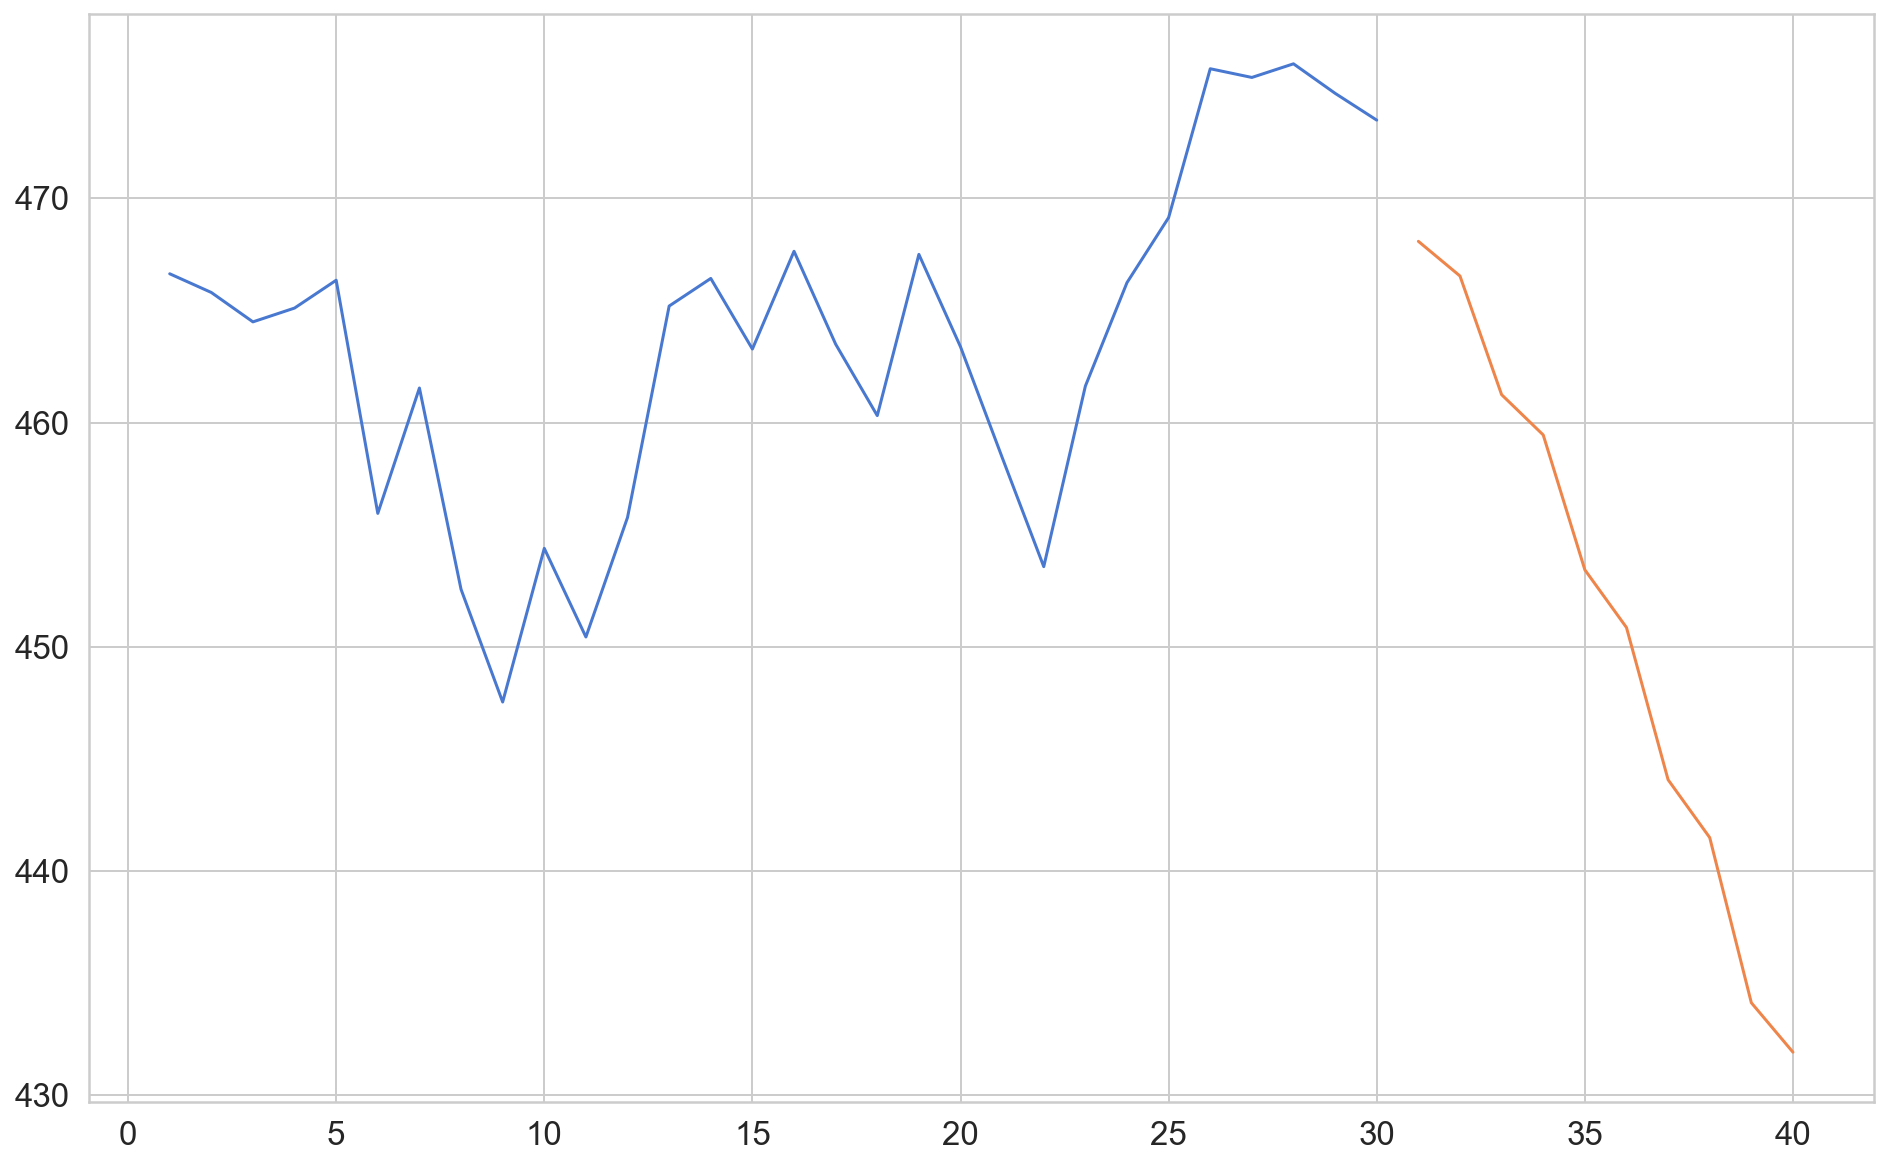

In [113]:
plt.plot(day_new,scaler.inverse_transform(data_cnn[2487:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

We further plot this pure CNN model on the overall graph to get a macro visualization of this trend

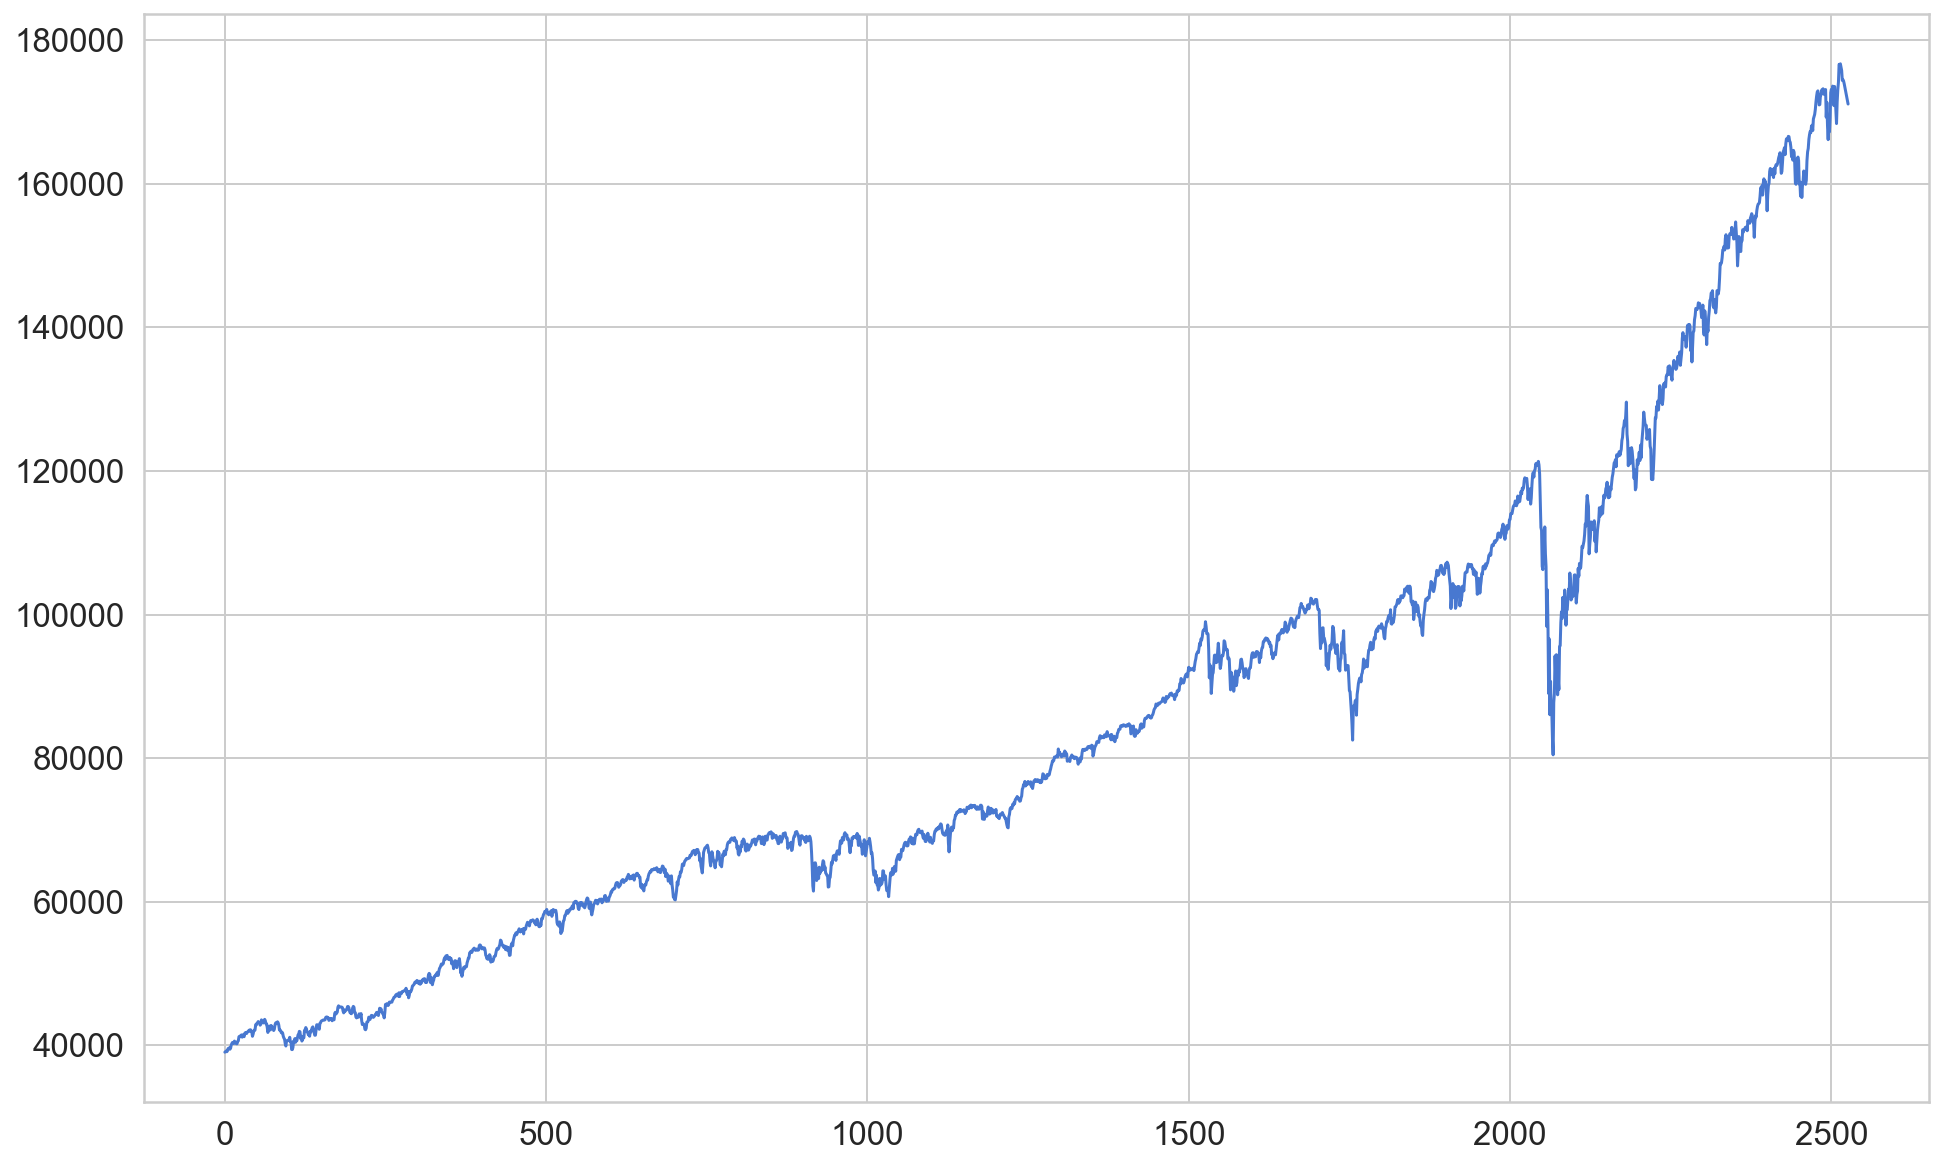

In [114]:
data2=scaler.inverse_transform(data2).tolist()
plt.plot(data2)

**<h2><center><font color='brown'> Creating a New Data Set</font></center></h2>**

Now we compile these 10 predicted values and convert them from a numpy array to an indexed pandas array through a simple matrix transpose in the following steps. We will then append this with the previous 20 day observed values as well, which will provide us with a new 30 trading day dataset which we will label as compiled_data2.

In [115]:
actual_pred=day_pred,scaler.inverse_transform(lst_output)
actual_pred

(array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),
 array([[468.08345059],
        [466.53634702],
        [461.24273731],
        [459.44594038],
        [453.42965749],
        [450.85593605],
        [444.06562587],
        [441.48438487],
        [434.11694909],
        [431.91199532]]))

In [116]:
data_pd=pd.DataFrame(actual_pred)
data_pd

,0,1,2,3,4,5,6,7,8,9
0,31,32,33,34,35,36,37,38,39,40
1,[468.08345059158546],[466.5363470226366],[461.2427373055607],[459.445940381167],[453.42965749469204],[450.85593604563746],[444.0656258736126],[441.48438487266685],[434.1169490929951],[431.9119953152149]


In [117]:
data_pred=data_pd.transpose()
data_pred.columns=["Future_date","Stock_price"]
data_pred.drop(["Future_date"],axis=1,inplace=True)

In [118]:
data_pred['Stock_price'] =  data_pred['Stock_price'].str.get(0)

In [119]:
data_pred=pd.DataFrame(data_pred['Stock_price'])

In [120]:
data_pred.tail()

,Stock_price
5,450.855936
6,444.065626
7,441.484385
8,434.116949
9,431.911995


In [121]:
data_pred.shape

(10, 1)

In [122]:
company = 'SPY'
#Date from which we are collecting the data (year, month, date)
start = dt.datetime(2021,12,6)
end = dt.datetime(2021,12,31)
df2 = web.DataReader(company, 'yahoo', start, end)
df2=df2["Adj Close"]

In [123]:
df2=pd.DataFrame(df2)
df2=df2.rename(columns={"Adj Close": "Stock_price"})
df2.reset_index(drop=True, inplace=True)
df2.shape

(19, 1)

In [124]:
compiled_data2=df2.append(data_pred, ignore_index=True)
compiled_data2.shape

(29, 1)

In [125]:
compiled_data2.tail()

,Stock_price
24,450.855936
25,444.065626
26,441.484385
27,434.116949
28,431.911995


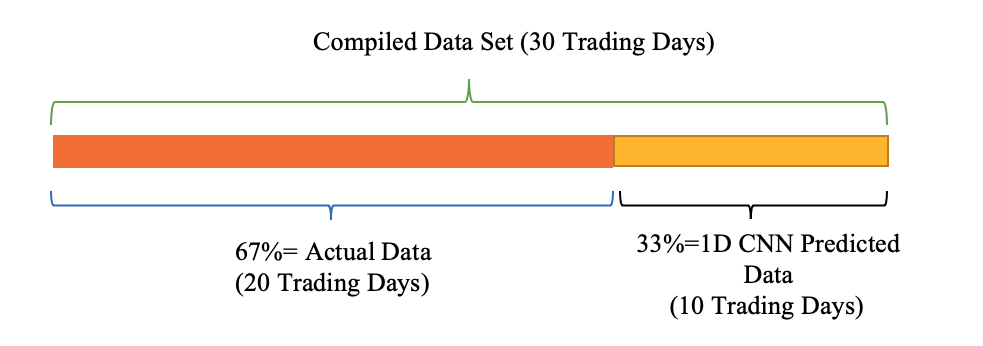

In [172]:
Image(filename="Desktop/Data2.png",width=1000,height=1000)

**<h2><center><font color='brown'>1D CNN +Geometric Brownian Motion Model</font></center></h2>** <br>

Now, here we apply the GBM cover on our new compiled data where 33% of values are 1D CNN predicted values which we found previously and have been now appended to actual trading value observations which compose of 67% of the dataset.

In [126]:
data_returns=compiled_data2.pct_change()
data_returns=data_returns.dropna()

In [127]:
#compute the drift(mean) and diffusion(variance) coefficients and annualize it by multiplying by 30 trading days 
mu = data_returns.mean() * 30.            
sig = data_returns.std()* np.sqrt(30.)

print(mu)
print(sig)

Stock_price   -0.056014
dtype: float64
Stock_price    0.05647
dtype: float64


In [128]:
So = compiled_data2[:1]
mu = mu
sigma = sig
W = BrownianMotion(seed, N)
N = 30   #for the totality of 30 days 
T = 1.0        

t = np.linspace(0., T, N)    #time increments

Upon plotting the graph of a 1D CNN+GBM motion we find that the graph has a steady downward directional movement in stark contrast to plain CNN graph which sloped down very quickly in a staircase fashion.

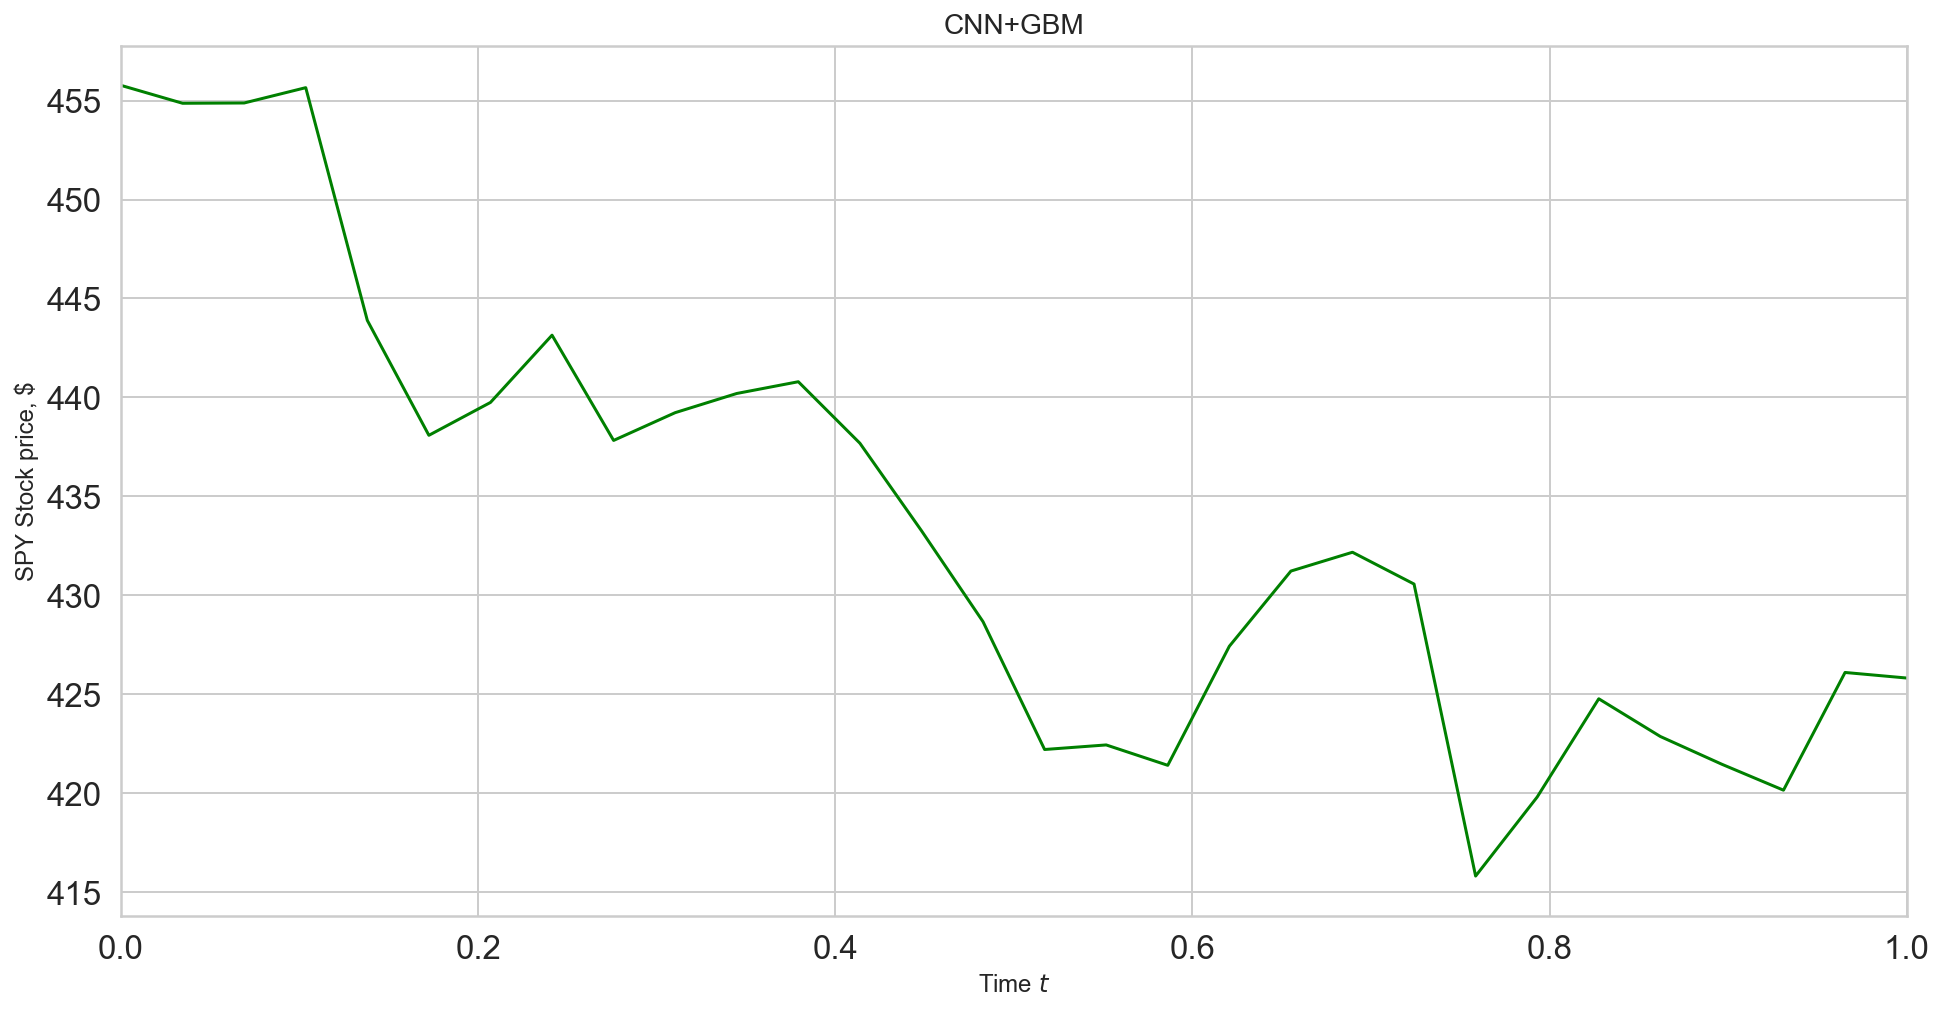

In [129]:
#plot solution

compiled_solution2 = GBM_Exact(So, mu, sig, W, N, t)
compiled_solution2=np.reshape(compiled_solution2,(30,1))
compiled_solution2=pd.DataFrame(compiled_solution2)
compiled_solution2=compiled_solution2.rename(columns={"0": "Stock_price"})

plt.figure(figsize = (16, 8))
plt.plot(t, compiled_solution2, color = "green")

#plt.scatter(t, solution, color = "black")
plt.title('CNN+GBM', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SPY Stock price, $', fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

**<h2><center><font color='brown'>Geometric Brownian Motion Model</font></center></h2>** <br>

Now we also plot the Geometric Brownian Motion (GBM) as well on the actual dataset without an Neural Network observations inculcated in it. Keep in mind that the GBM motion found here is similar to the GBM motion we found earlier under LSTM study. This should be similar since the dataset is same and GBM predictions do not change when re-computed (atleast under the assumption when every circumstances are unchanged).

In [130]:
company = 'SPY'

#Date from which we are collecting the data (year, month, date)
start = dt.datetime(2021,12,6)
end = dt.datetime(2022,1,16)
brown_data2 = web.DataReader(company, 'yahoo', start, end)
brown_data2=brown_data["Adj Close"]
brown_data2=pd.DataFrame(brown_data)
brown_data2.shape

(29, 1)

In [131]:
brown_data2.head()

,Adj Close
Date,
2021-12-06,455.767914
2021-12-07,465.195404
2021-12-08,466.427216
2021-12-09,463.278107
2021-12-10,467.639160


In [132]:
#compute the drift(mean) and diffusion(variance) coefficients and annualize it by multiplying by 250 trading days 
mu = returns.mean() * 30.            
sig = returns.std()* np.sqrt(30.)

print(mu)
print(sig)

Adj Close    0.018915
dtype: float64
Adj Close    0.053783
dtype: float64


In [133]:
So = brown_data2[:1]
mu = mu
sigma = sig
W = BrownianMotion(seed, N)
N = 30   #For the totality of 30 days
T = 1.0        

t = np.linspace(0., T, N)    #time increments

As mentioned, the GBM movements we see are exactly the same without any sort of distortions.

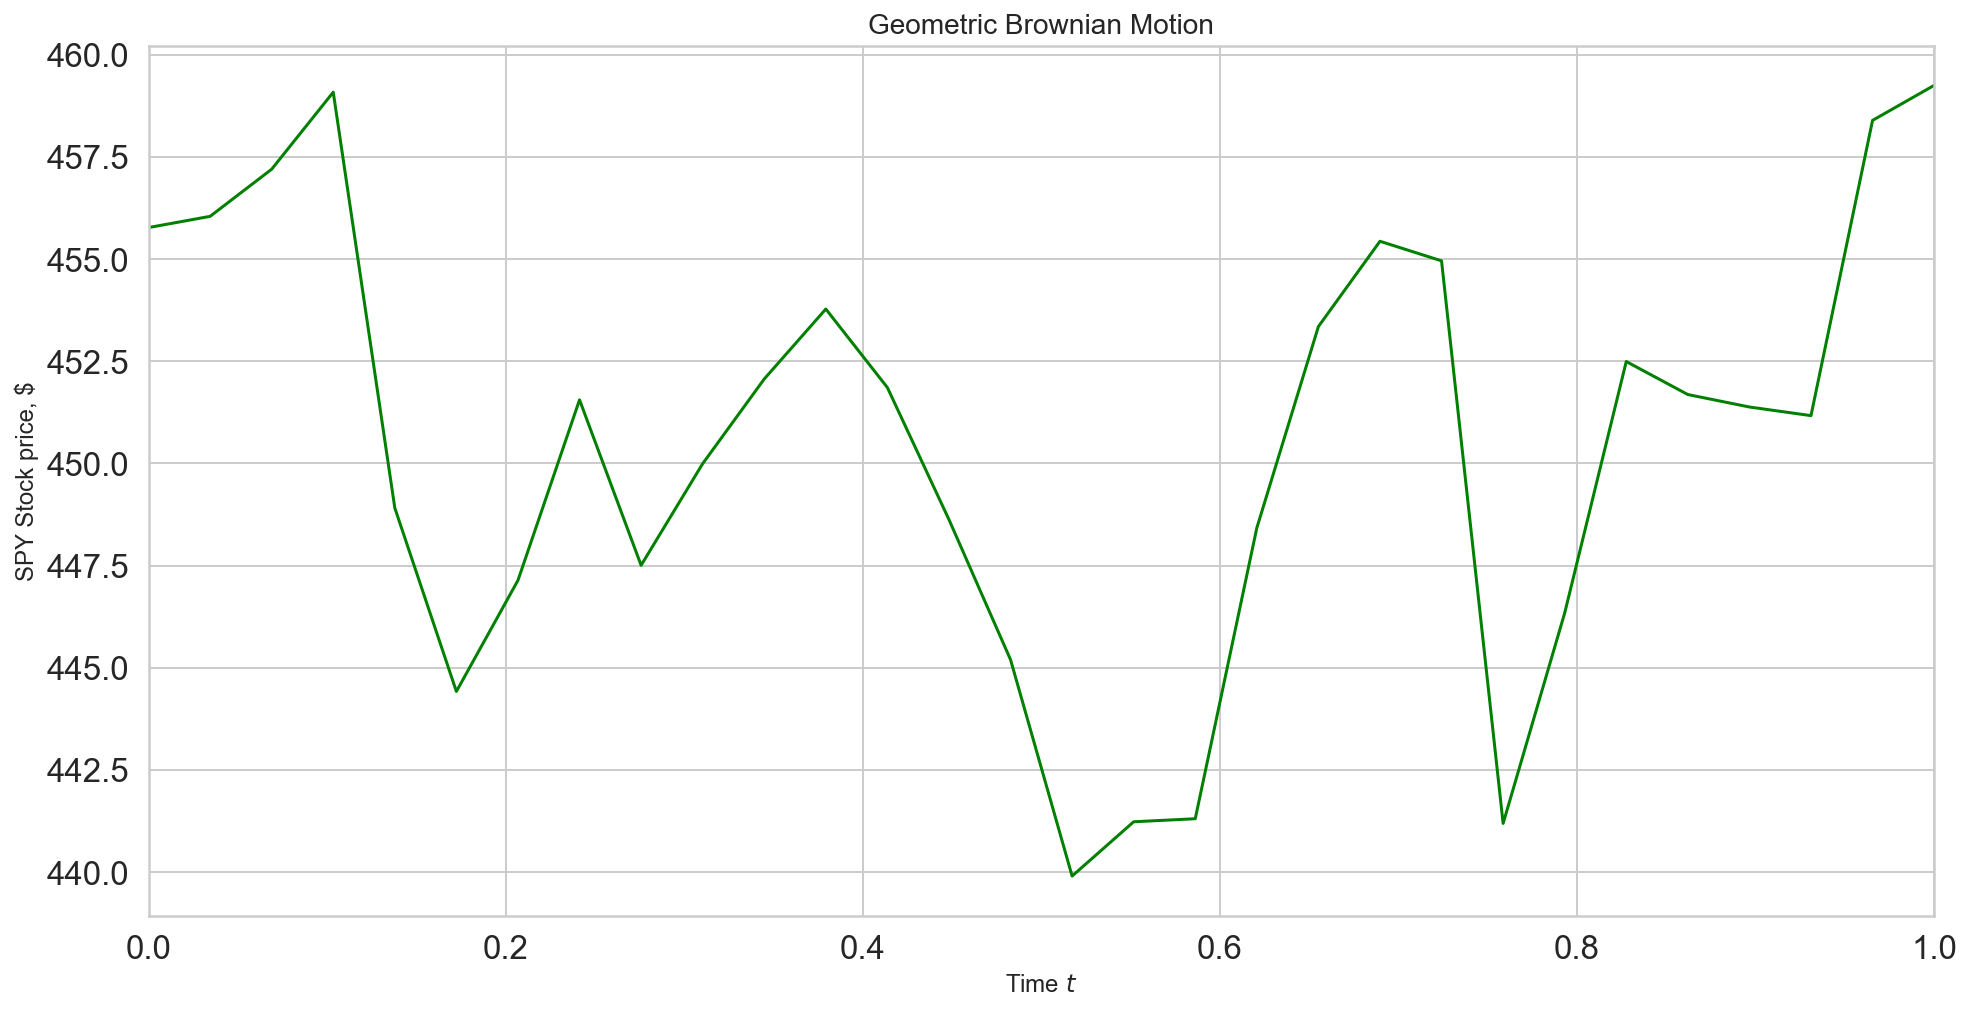

In [134]:
#plot solution

brownian_solution2 = GBM_Exact(So, mu, sig, W, N, t)
brownian_solution2=np.reshape(brownian_solution2,(30,1))
brownian_solution2=pd.DataFrame(brownian_solution2)
brownian_solution2=brownian_solution2.rename(columns={"0": "Stock_price"})

plt.figure(figsize = (16, 8))
plt.plot(t, brownian_solution2, color = "green")

#plt.scatter(t, solution, color = "black")
plt.title('Geometric Brownian Motion', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SPY Stock price, $', fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

**<h2><center><font color='brown'>Comparative Study</font></center></h2>** <br>

Now, we do a comparative analysis again of our predictions and how they look like. We also test our performance metrics on it. We start by extracting the data which the market actually obseves during the time period that gets predicted over the same 30 day period that the 1d CNN+GBM and pure GBM models had predicted previously.

In [135]:
company = 'SPY'
#Date from which we are collecting the data (year, month, date)
start = dt.datetime(2022,1,17)
end = dt.datetime(2022,3,1)
general_data2 = web.DataReader(company, 'yahoo', start, end)
general_data2=general_data2["Adj Close"]

In [136]:
general_data2.reset_index(drop=True, inplace=True)
general_data2=pd.DataFrame(general_data2)

Notice now, this time we have a much more of a bearish run for a CNN+GBM model in comparison to the General Brownian Motion. In fact, the directionality of our neural network based model has a much more closer prediction to actual data points!

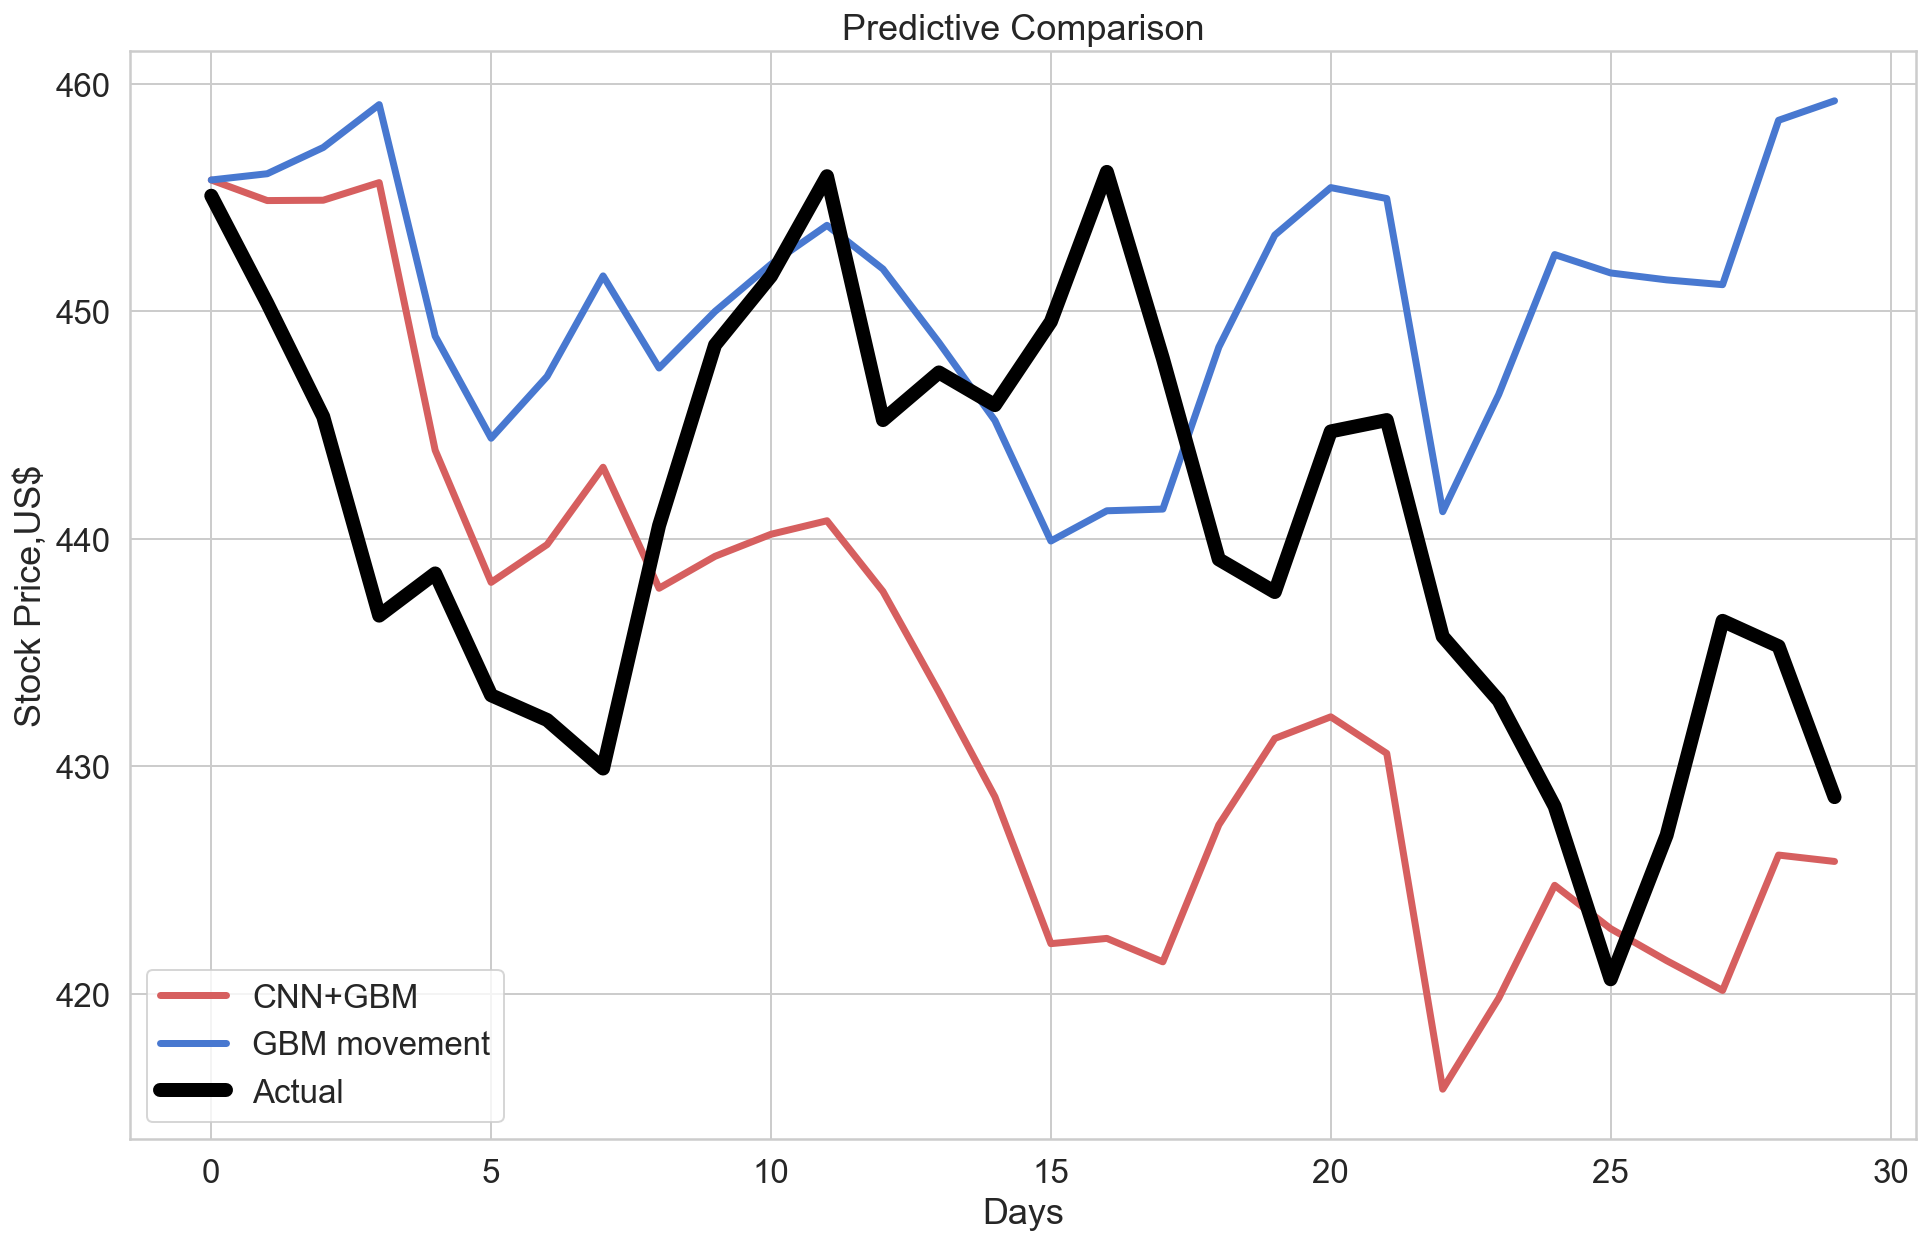

In [137]:
plt.plot(compiled_solution2, color='r', label='CNN+GBM',linewidth=3.5)
plt.plot(brownian_solution2, color='b', label='GBM movement',linewidth=3.5)
plt.plot(general_data2, color='black', label='Actual',linewidth=7.0)

plt.xlabel("Days")
plt.ylabel("Stock Price,US$")
plt.title("Predictive Comparison")

plt.legend()

**<h2><center><font color='brown'>RMSE Metrics on Predictions</font></center></h2>** <br>

Our 1D CNN + GBM has performed close to our LSTM+GBM model and has actually done better. In fact, the pleasant surprise we get to see is that the 1D CNN+GBM also outperforms pure GBM model by around 90 basis points!

In [139]:
math.sqrt(mean_squared_error(general_data2,compiled_solution2))

13.98647687612179

In [140]:
math.sqrt(mean_squared_error(general_data2,brownian_solution2))

14.899140292353366

**<h2><center><font color='brown'>Arbitrage Value</font></center></h2>** <br>

Now we finally get to compute the Arbitrage Values of our model of 1D CNN + GBM, pure GBM and as well as the actual observed values. What we see is a contraposition of results here.

Of course the Arbitrage solutions for observed and Geometric Brownian Data is same as seen before but our model tends to be more bearish this time with a predicted value of 10.28 dollars per share (approx.)  in comparison to our previous findings with LSTM+GBM.

In [141]:
float(Arbitrage_value(compiled_solution2))

10.28813

In [142]:
float(Arbitrage_value(brownian_solution2))

19.34412

In [144]:
float(Arbitrage_value(general_data2))

15.75107

**<h1><center><font color='brown'>Summary of Results</font></center></h1>** 

In this summary of results, we finally collect key observations and plot them. So in the plot below notice that the thick black line is the actual prediction of stock movement that we see. Visually, we can easily spot that LSTM+GBM model tends to be highly bullish and at the same time a risky model as it excarbates the direction of a pure GBM model. So, if the GBM model gets it right then the LSTM+GBM model would show extreme accuracy but in this case we see quite the opposite of that.

However, the CNN+GBM model tends to perform better as it takes an inverse directional movement of the pure GBM model. Once could argue that this model is a perfect contraposition to the LSTM model and is rather more conservative in it's prediction as it predicts a Bearish run.

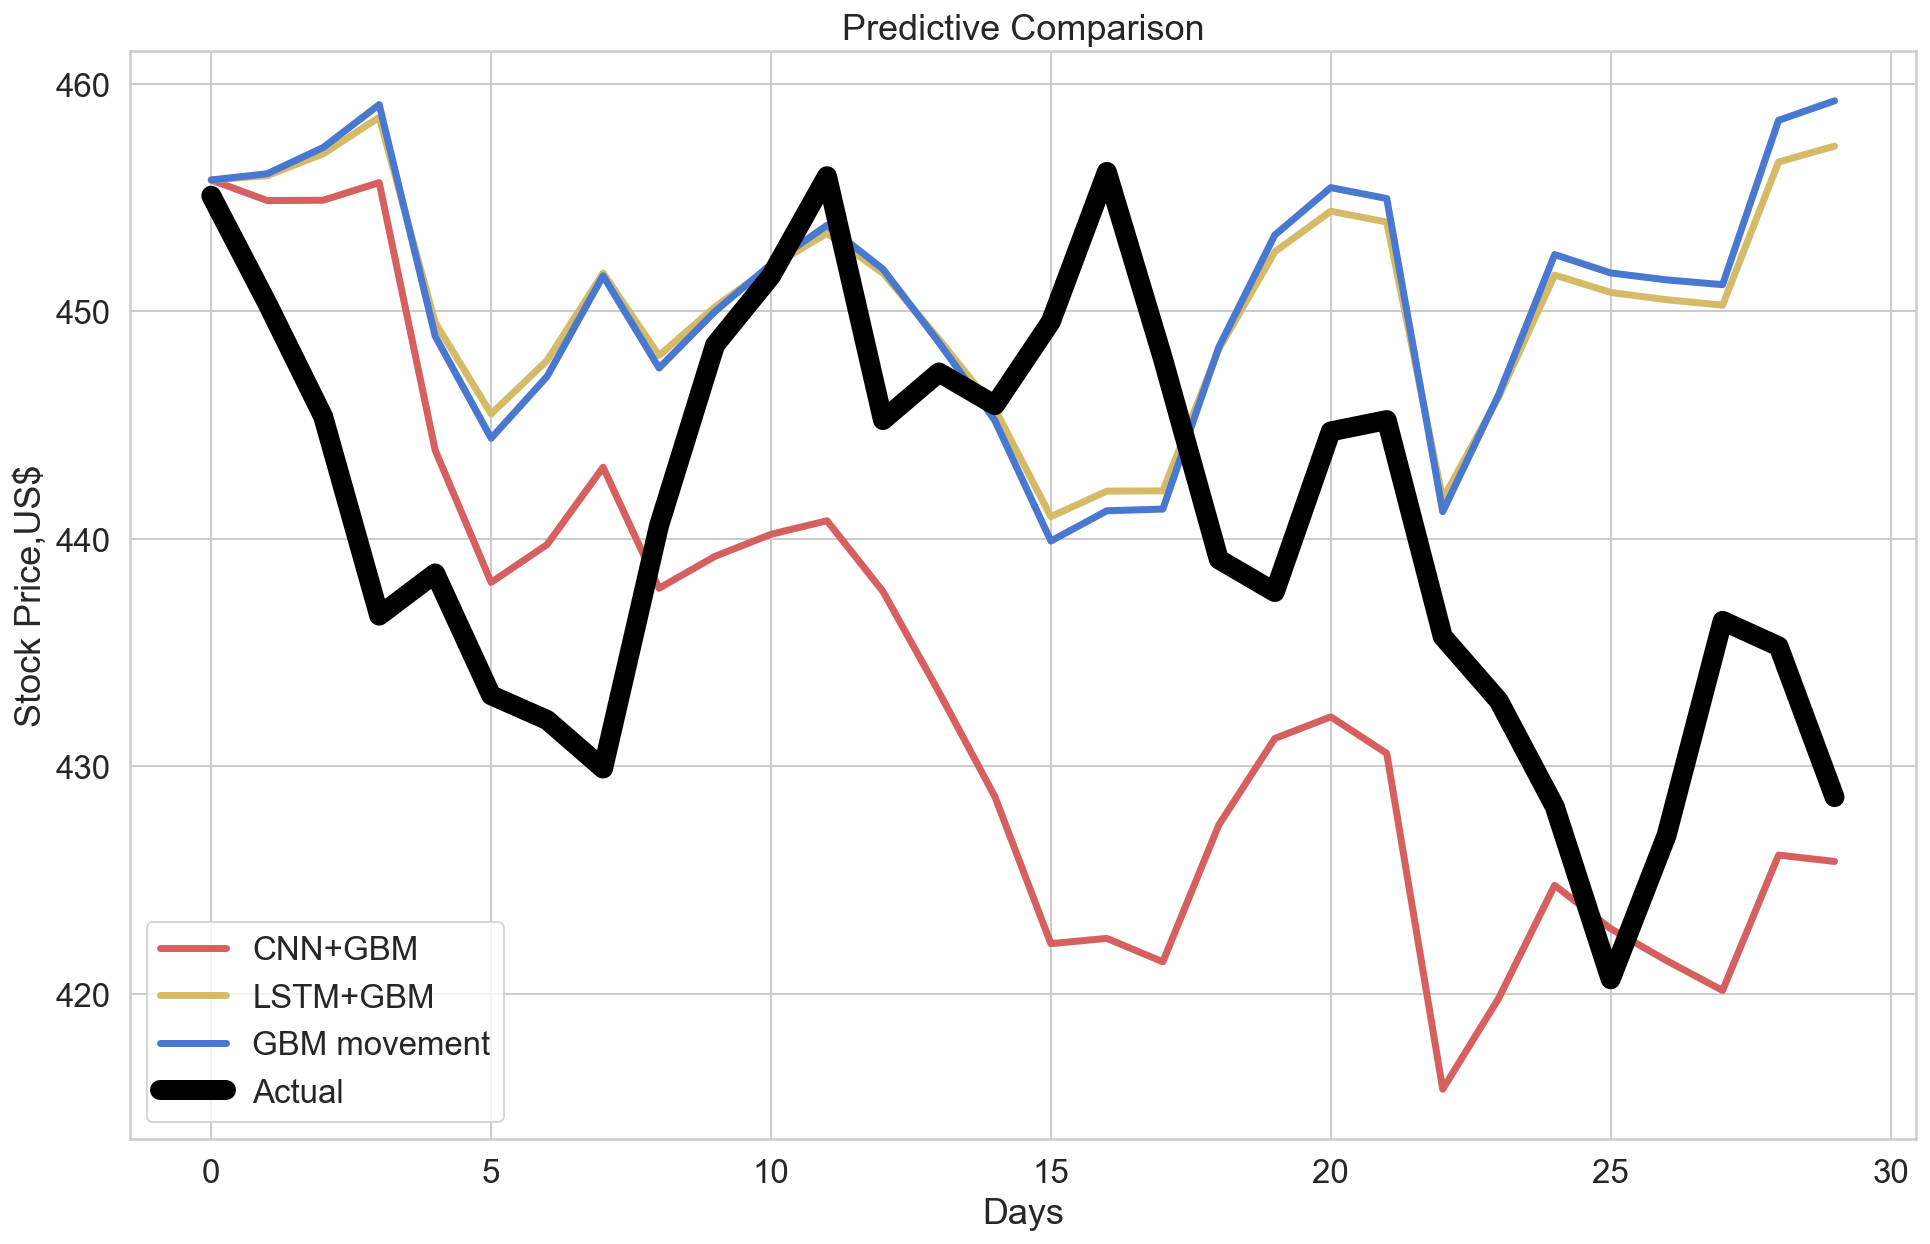

In [146]:
plt.plot(compiled_solution2, color='r', label='CNN+GBM',linewidth=3.5)
plt.plot(compiled_solution, color='y', label='LSTM+GBM',linewidth=3.5)
plt.plot(brownian_solution2, color='b', label='GBM movement',linewidth=3.5)
plt.plot(general_data2, color='black', label='Actual',linewidth=10.0)

plt.xlabel("Days")
plt.ylabel("Stock Price,US$")
plt.title("Predictive Comparison")

plt.legend()

Here we have collected our data into one single table for LSTM+GBM, CNN+GBM and pure GBM. In the RMSE column, all the values are with respect to the actual observed values in the market. Out of which CNN performs the best although the RMSE scores for all three models are very close. <br>

Clearly LSTM+GBM and GBM model show a bullish run with highest arbitrage prediction for GBM. While CNN + GBM is the only value which shows a bearish run. However, when it comes to par values computed by the difference of arbitrage of the model and actual arbitrage on market data, we see that the LSTM+GBM comes remarkably close with a deviation of 53 cents approximately!

In [153]:
final_data=[{'RMSE':math.sqrt(mean_squared_error(general_data,compiled_solution)),
             'Arbitrage':float(Arbitrage_value(compiled_solution)),
            'Par':float(Arbitrage_value(compiled_solution))-float(Arbitrage_value(general_data)),
            'Motion':'Bullish'},
            {'RMSE':math.sqrt(mean_squared_error(general_data,compiled_solution2)),
            'Arbitrage':float(Arbitrage_value(compiled_solution2)),
            'Par':float(Arbitrage_value(compiled_solution2))-float(Arbitrage_value(general_data)),
            'Motion': 'Bearish'},
           {'RMSE':math.sqrt(mean_squared_error(general_data,brownian_solution2)),
           'Arbitrage':float(Arbitrage_value(brownian_solution2)),
           'Par':float(Arbitrage_value(brownian_solution2))-float(Arbitrage_value(general_data)),
           'Motion':'Bullish'}]

In [151]:
final_results=pd.DataFrame(final_data,index=["LSTM","CNN","Brownian"])
final_results

,RMSE,Arbitrage,Par,Motion
LSTM,14.402013,16.28179,0.53072,Bullish
CNN,13.986477,10.28813,-5.46294,Bearish
Brownian,14.899140,19.34412,3.59305,Bullish


**<h1><center><font color='brown'>Conclusion</font></center></h1>** 

We find very interesting results in this study where in both cases of our custom models involving our neural networks, both of them seem to be showing metrics which are more accurate than Geometric Brownian Motion. GBM implementations are usually considered the gold standard in investment banking, both in Fixed Income & Equities and as well as in high latency algorithmic trading. 

So, if one was to deploy one of the custom models in this jupyter notebook, it would probably be in the sector of equity markets of high volume trade. **But this is not an investment advice** since real algorithmic trades made on such models have degrees of corrections and twitches made on the basis of rational events such as change in interest rates, earnings calls or even trading day breaks due to national holidays that result in resistance breakouts or support cracks.

But one thing we can really discern is that the Neural Networks tend to provide a sense of directionality of observed values once a GBM is applied on the custom dataset that we create. But the problem with Neural Networks is the fluidity of results. Everytime we re-run the Neural Networks models such as the LSTM or CNN, we will see directionality changing over and over again that skews our understanding of predictive modelling with such neural networks. This is because in every neurons, as mentioned before, has forget gates which randomly forget or store features that might not be identical in a next simulation. But does that mean our predictions with this project do not lead into any conclusion? 

Not really! Because Neural Networks have started emerging in Equity and Investment Research as a tool for creating scenarios and simulations than actually being deployed for predicting stock price movements. Most hedge funds or investment banks have their own algorithmic trading methods which are a combination of multiple Data Science tools for price arbitraging with secondary triggers. Some of these tools might also have a use for such neural network involvements that can be implemented on the basis of market sentiment of a bullish or a bearish run.

Perhaps over time we can create such high end mixture tools that can create stable systems of algorithmic trade that can find it's place beyond market research!

**<h1><center><font color='brown'>References/Citations:</font></center></h1>** 

1. Ros, Jordi Mora. “U.S. GDP and S&amp;P500.” https://repositori.upf.edu/bitstream/handle/10230/42502/TFGECO1819USGDPMora.pdf?sequence=1&amp;isAllowed=y. Universitat Pompeu Fabra, 2019. 

2. Bayram, Mustafa, Tugcem Partal, and Gulsen Orucova Buyukoz. “Numerical Methods for Simulation of Stochastic Differential Equations - Advances in Continuous and Discrete Models.” SpringerOpen. Springer International Publishing, January 15, 2018. https://advancesindifferenceequations.springeropen.com/articles/10.1186/s13662-018-1466-5. 

3. Hull, John C. “Wiener Processes and Itô's Lemma.” Essay. In Options, Futures, and Other Derivatives, 280–92. Harlow: Pearson Education Limited, 2022. 

4. Ermogenous, Angeliki. “Brownian Motion and Its Applications in the Stock Market.” CORE. University of Dayton, eCommons, 2006. https://core.ac.uk/display/232827609. 

5. Fama, Eugene. “Efficient Capital Markets: A Review of Theory and Empirical Work - JSTOR.” JSTOR, May 1970. https://www.jstor.org/stable/2325486. 

6. Picture Sources: Wikipedia, The New York Times, Macnica Japan, Giphy, Towards Data Science, Berkeley Artificial Research (BAIR), Science Photo Library, The Bloomberg Terminal.